In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime

In [2]:
#import data
retail_df= pd.read_csv("BSS_Retail_Data.csv")

In [3]:
# Define the time period
start = datetime.datetime(2022, 1, 1)  # Adjust as needed
end = datetime.datetime(2025, 1, 1)

# Fetch the dataset from FRED
series_id = 'PCU42993042993042'  # Series ID for Recyclable Plastics
plastic_df = web.DataReader(series_id, 'fred', start, end)

# Rename the columns
plastic_df.rename(columns={'PCU42993042993042': 'Plastic_Price'}, inplace=True)

# Create a 'salesdate' column (the index is the date)
plastic_df.reset_index(inplace=True)
plastic_df.rename(columns={'DATE': 'observationdate'}, inplace=True)

# Display the first 10 rows
print(plastic_df.head(10))

  observationdate  Plastic_Price
0      2022-01-01        103.028
1      2022-02-01        104.772
2      2022-03-01        102.513
3      2022-04-01        110.935
4      2022-05-01        112.824
5      2022-06-01        113.406
6      2022-07-01        113.358
7      2022-08-01        113.043
8      2022-09-01        105.286
9      2022-10-01         96.634


In [4]:
# Define the time period
start = datetime.datetime(2022, 1, 1)  # Adjust as needed
end = datetime.datetime(2025, 1, 1)

# Fetch the dataset from FRED
series_id = 'WPU08510502'  # Series ID for Recyclable Plastics
wood_df = web.DataReader(series_id, 'fred', start, end)

# Rename the columns
wood_df.rename(columns={'WPU08510502': 'Wood_Price'}, inplace=True)

# Create a 'salesdate' column (the index is the date)
wood_df.reset_index(inplace=True)
wood_df.rename(columns={'DATE': 'observationdate'}, inplace=True)

# Display the first 10 rows
print(wood_df.head(10))

  observationdate  Wood_Price
0      2022-01-01     114.917
1      2022-02-01     115.048
2      2022-03-01     115.753
3      2022-04-01     116.017
4      2022-05-01     116.631
5      2022-06-01     117.698
6      2022-07-01     118.228
7      2022-08-01     117.611
8      2022-09-01     117.449
9      2022-10-01     116.862


In [5]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122801 entries, 0 to 122800
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   sku                      122801 non-null  object 
 1   salesdate                122801 non-null  object 
 2   price                    122801 non-null  float64
 3   unitsordered             122801 non-null  int64  
 4   sales                    122801 non-null  float64
 5   cogs                     122801 non-null  float64
 6   fba                      122801 non-null  float64
 7   reffee                   122801 non-null  float64
 8   adspend                  122801 non-null  float64
 9   profit                   122801 non-null  float64
 10  comp_1_price             78732 non-null   float64
 11  comp_2_price             48465 non-null   float64
 12  comp_3_price             20759 non-null   float64
 13  comp_4_price             7261 non-null    float64
 14  comp

In [6]:
wood_df.info()
plastic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   observationdate  37 non-null     datetime64[ns]
 1   Wood_Price       37 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 724.0 bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   observationdate  37 non-null     datetime64[ns]
 1   Plastic_Price    37 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 724.0 bytes


In [7]:
#change salesdate to datetime from object
retail_df['salesdate'] = pd.to_datetime(retail_df['salesdate'])
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122801 entries, 0 to 122800
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   sku                      122801 non-null  object        
 1   salesdate                122801 non-null  datetime64[ns]
 2   price                    122801 non-null  float64       
 3   unitsordered             122801 non-null  int64         
 4   sales                    122801 non-null  float64       
 5   cogs                     122801 non-null  float64       
 6   fba                      122801 non-null  float64       
 7   reffee                   122801 non-null  float64       
 8   adspend                  122801 non-null  float64       
 9   profit                   122801 non-null  float64       
 10  comp_1_price             78732 non-null   float64       
 11  comp_2_price             48465 non-null   float64       
 12  comp_3_price    

In [8]:
#Match based on the observation of months

#create new column in each dataset that would consist of MMYYYY format, which we will merge the dataset
retail_df['sales_month'] = retail_df['salesdate'].dt.to_period('M')
wood_df['ppi_month'] = wood_df['observationdate'].dt.to_period('M')
plastic_df['ppi_month'] = plastic_df['observationdate'].dt.to_period('M')
retail_df.head(5)

,sku,salesdate,price,unitsordered,sales,cogs,fba,reffee,adspend,profit,...,comp_2_price,comp_3_price,comp_4_price,comp_5_price,comp_data_min_price,comp_data_max_price,managed_fba_stock_level,min_price,max_price,sales_month
0,Envelopes SKU 4,2022-01-01,29.49,19,560.0,236.0,156.0,84.0,0.0,84.0,...,27.97,30.99,NaN,NaN,27.97,30.99,NaN,27.99,34.99,2022-01
1,Envelopes SKU 4,2022-01-02,29.99,13,390.0,161.0,107.0,58.0,0.0,64.0,...,27.97,30.99,NaN,NaN,27.97,30.99,NaN,27.99,34.99,2022-01
2,Envelopes SKU 4,2022-01-03,29.69,84,2494.0,1042.0,690.0,374.0,0.0,388.0,...,27.97,30.99,NaN,NaN,27.97,30.99,NaN,27.99,34.99,2022-01
3,Envelopes SKU 4,2022-01-04,29.79,78,2324.0,968.0,641.0,349.0,0.0,366.0,...,27.97,30.99,NaN,NaN,27.97,30.99,NaN,27.99,34.99,2022-01
4,Envelopes SKU 4,2022-01-05,29.79,83,2473.0,1030.0,682.0,371.0,0.0,390.0,...,27.97,30.99,NaN,NaN,27.97,30.99,NaN,27.99,34.99,2022-01


In [9]:
plastic_df.head(5)

,observationdate,Plastic_Price,ppi_month
0,2022-01-01,103.028,2022-01
1,2022-02-01,104.772,2022-02
2,2022-03-01,102.513,2022-03
3,2022-04-01,110.935,2022-04
4,2022-05-01,112.824,2022-05


In [10]:
wood_df.head(5)

,observationdate,Wood_Price,ppi_month
0,2022-01-01,114.917,2022-01
1,2022-02-01,115.048,2022-02
2,2022-03-01,115.753,2022-03
3,2022-04-01,116.017,2022-04
4,2022-05-01,116.631,2022-05


In [11]:
#merge based on sales_month and PPI_month column for wood
retail_df= pd.merge(
    retail_df,
    wood_df[['ppi_month', 'Wood_Price']],
    left_on='sales_month',
    right_on='ppi_month',
    how='left')

retail_df.head(5)

,sku,salesdate,price,unitsordered,sales,cogs,fba,reffee,adspend,profit,...,comp_4_price,comp_5_price,comp_data_min_price,comp_data_max_price,managed_fba_stock_level,min_price,max_price,sales_month,ppi_month,Wood_Price
0,Envelopes SKU 4,2022-01-01,29.49,19,560.0,236.0,156.0,84.0,0.0,84.0,...,NaN,NaN,27.97,30.99,NaN,27.99,34.99,2022-01,2022-01,114.917
1,Envelopes SKU 4,2022-01-02,29.99,13,390.0,161.0,107.0,58.0,0.0,64.0,...,NaN,NaN,27.97,30.99,NaN,27.99,34.99,2022-01,2022-01,114.917
2,Envelopes SKU 4,2022-01-03,29.69,84,2494.0,1042.0,690.0,374.0,0.0,388.0,...,NaN,NaN,27.97,30.99,NaN,27.99,34.99,2022-01,2022-01,114.917
3,Envelopes SKU 4,2022-01-04,29.79,78,2324.0,968.0,641.0,349.0,0.0,366.0,...,NaN,NaN,27.97,30.99,NaN,27.99,34.99,2022-01,2022-01,114.917
4,Envelopes SKU 4,2022-01-05,29.79,83,2473.0,1030.0,682.0,371.0,0.0,390.0,...,NaN,NaN,27.97,30.99,NaN,27.99,34.99,2022-01,2022-01,114.917


In [12]:
#merge based on sales_month and PPI_month column for plastic
retail_df= pd.merge(
    retail_df,
    plastic_df[['ppi_month', 'Plastic_Price']],
    left_on='sales_month',
    right_on='ppi_month',
    how='left')

retail_df.head(5)

,sku,salesdate,price,unitsordered,sales,cogs,fba,reffee,adspend,profit,...,comp_data_min_price,comp_data_max_price,managed_fba_stock_level,min_price,max_price,sales_month,ppi_month_x,Wood_Price,ppi_month_y,Plastic_Price
0,Envelopes SKU 4,2022-01-01,29.49,19,560.0,236.0,156.0,84.0,0.0,84.0,...,27.97,30.99,NaN,27.99,34.99,2022-01,2022-01,114.917,2022-01,103.028
1,Envelopes SKU 4,2022-01-02,29.99,13,390.0,161.0,107.0,58.0,0.0,64.0,...,27.97,30.99,NaN,27.99,34.99,2022-01,2022-01,114.917,2022-01,103.028
2,Envelopes SKU 4,2022-01-03,29.69,84,2494.0,1042.0,690.0,374.0,0.0,388.0,...,27.97,30.99,NaN,27.99,34.99,2022-01,2022-01,114.917,2022-01,103.028
3,Envelopes SKU 4,2022-01-04,29.79,78,2324.0,968.0,641.0,349.0,0.0,366.0,...,27.97,30.99,NaN,27.99,34.99,2022-01,2022-01,114.917,2022-01,103.028
4,Envelopes SKU 4,2022-01-05,29.79,83,2473.0,1030.0,682.0,371.0,0.0,390.0,...,27.97,30.99,NaN,27.99,34.99,2022-01,2022-01,114.917,2022-01,103.028


In [13]:
#drop columns ppi_month_x, ppi_month_y, sales_month
retail_df = retail_df.drop(columns=['ppi_month_x', 'ppi_month_y', 'sales_month'])
retail_df.head(5)

,sku,salesdate,price,unitsordered,sales,cogs,fba,reffee,adspend,profit,...,comp_3_price,comp_4_price,comp_5_price,comp_data_min_price,comp_data_max_price,managed_fba_stock_level,min_price,max_price,Wood_Price,Plastic_Price
0,Envelopes SKU 4,2022-01-01,29.49,19,560.0,236.0,156.0,84.0,0.0,84.0,...,30.99,NaN,NaN,27.97,30.99,NaN,27.99,34.99,114.917,103.028
1,Envelopes SKU 4,2022-01-02,29.99,13,390.0,161.0,107.0,58.0,0.0,64.0,...,30.99,NaN,NaN,27.97,30.99,NaN,27.99,34.99,114.917,103.028
2,Envelopes SKU 4,2022-01-03,29.69,84,2494.0,1042.0,690.0,374.0,0.0,388.0,...,30.99,NaN,NaN,27.97,30.99,NaN,27.99,34.99,114.917,103.028
3,Envelopes SKU 4,2022-01-04,29.79,78,2324.0,968.0,641.0,349.0,0.0,366.0,...,30.99,NaN,NaN,27.97,30.99,NaN,27.99,34.99,114.917,103.028
4,Envelopes SKU 4,2022-01-05,29.79,83,2473.0,1030.0,682.0,371.0,0.0,390.0,...,30.99,NaN,NaN,27.97,30.99,NaN,27.99,34.99,114.917,103.028


In [14]:
#problem statement for project
#company is trying to be environmentally friendly and trying to see if there is a relationship between raw materials and products
#and does it effect the profit while keeping the competitive price.

In [15]:
retail_df.describe()

,salesdate,price,unitsordered,sales,cogs,fba,reffee,adspend,profit,comp_1_price,...,comp_3_price,comp_4_price,comp_5_price,comp_data_min_price,comp_data_max_price,managed_fba_stock_level,min_price,max_price,Wood_Price,Plastic_Price
count,122801,122801.000000,122801.000000,122801.000000,122801.000000,122801.000000,122801.000000,122801.000000,122801.000000,78732.000000,...,20759.000000,7261.000000,1776.000000,85258.000000,85258.000000,98599.000000,122801.000000,122801.000000,122801.000000,122801.000000
mean,2022-10-12 04:59:10.368482304,22.122653,18.827225,476.844122,157.555582,137.206440,71.524890,29.419044,81.138167,28.167190,...,27.481059,27.061326,27.157185,26.235121,31.432526,1136.294526,23.098786,33.264737,115.827391,100.489885
min,2022-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4379.000000,4.840000,...,8.950000,9.950000,9.120000,4.840000,5.580000,0.000000,6.990000,4.990000,112.068000,89.573000
25%,2022-05-31 00:00:00,15.790000,2.000000,42.000000,14.000000,13.000000,6.000000,0.000000,0.000000,19.790000,...,15.970000,14.990000,12.980000,18.290000,21.770000,284.000000,16.990000,23.990000,114.917000,91.720000
50%,2022-10-13 00:00:00,24.490000,7.000000,178.000000,60.000000,53.000000,27.000000,7.000000,17.000000,26.280000,...,23.690000,21.970000,29.990000,24.750000,29.150000,674.000000,21.990000,32.990000,116.631000,97.730000
75%,2023-02-25 00:00:00,28.390000,23.000000,566.000000,182.000000,164.000000,85.000000,29.000000,84.000000,34.800000,...,32.640000,30.150000,36.890000,30.480000,38.990000,1447.000000,25.990000,36.990000,117.397000,110.935000
max,2023-07-09 00:00:00,111.490000,833.000000,20900.000000,9654.000000,6847.000000,3135.000000,1628.000000,6753.000000,106.970000,...,81.460000,79.990000,49.830000,119.990000,119.990000,20796.000000,91.990000,135.990000,118.228000,113.406000
std,NaN,13.242831,30.380955,800.123608,284.147102,222.625203,120.018129,61.195799,189.055075,12.652012,...,14.910319,17.022967,11.275301,13.599655,15.133370,1394.284935,10.151873,14.986295,1.796218,9.022501


In [16]:
# Separate numeric and categorical columns
numeric_columns = retail_df.select_dtypes(include=['number', 'datetime']).columns.tolist()
categorical_columns = retail_df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# Output the result
print("Numeric Variables:", numeric_columns)
print("Categorical Variables:", categorical_columns)

Numeric Variables: ['salesdate', 'price', 'unitsordered', 'sales', 'cogs', 'fba', 'reffee', 'adspend', 'profit', 'comp_1_price', 'comp_2_price', 'comp_3_price', 'comp_4_price', 'comp_5_price', 'comp_data_min_price', 'comp_data_max_price', 'managed_fba_stock_level', 'min_price', 'max_price', 'Wood_Price', 'Plastic_Price']
Categorical Variables: ['sku']


In [17]:
missing_summary = pd.DataFrame({
    'Missing Values': retail_df.isnull().sum(),
    'Percentage Missing': retail_df.isnull().mean() * 100
})

# Filter out variables with no missing values (optional)
missing_summary = missing_summary[missing_summary['Missing Values'] > 0]

# Sort by percentage missing (optional)
missing_summary = missing_summary.sort_values(by='Percentage Missing', ascending=False)

print(missing_summary)

                         Missing Values  Percentage Missing
comp_5_price                     121025           98.553758
comp_4_price                     115540           94.087182
comp_3_price                     102042           83.095415
comp_2_price                      74336           60.533709
comp_1_price                      44069           35.886516
comp_data_min_price               37543           30.572227
comp_data_max_price               37543           30.572227
managed_fba_stock_level           24202           19.708309


In [18]:
#from above summary, only comp_5_price, comp_4_price, comp_3_price,comp_2_price,comp_1_price,comp_data_min_price,
#comp_data_max_price, and managed_fba_stock_level had missing data while all other variables had no missing data

In [19]:
#variables comp_3_price, comp_4_price, comp_5_price will be dropped considering missing values are high and close the the number of enteries in the dataset
#variables  comp_data_min_price, comp_data_max_price, and managed_fba_stock_level were dropped as they did not pertain to our goals
retail_df = retail_df.drop(columns = ['comp_3_price', 'comp_4_price', 'comp_5_price','comp_data_min_price', 'comp_data_max_price', 'managed_fba_stock_level'])
retail_df.head(5)

,sku,salesdate,price,unitsordered,sales,cogs,fba,reffee,adspend,profit,comp_1_price,comp_2_price,min_price,max_price,Wood_Price,Plastic_Price
0,Envelopes SKU 4,2022-01-01,29.49,19,560.0,236.0,156.0,84.0,0.0,84.0,28.49,27.97,27.99,34.99,114.917,103.028
1,Envelopes SKU 4,2022-01-02,29.99,13,390.0,161.0,107.0,58.0,0.0,64.0,28.49,27.97,27.99,34.99,114.917,103.028
2,Envelopes SKU 4,2022-01-03,29.69,84,2494.0,1042.0,690.0,374.0,0.0,388.0,28.49,27.97,27.99,34.99,114.917,103.028
3,Envelopes SKU 4,2022-01-04,29.79,78,2324.0,968.0,641.0,349.0,0.0,366.0,28.49,27.97,27.99,34.99,114.917,103.028
4,Envelopes SKU 4,2022-01-05,29.79,83,2473.0,1030.0,682.0,371.0,0.0,390.0,28.49,27.97,27.99,34.99,114.917,103.028


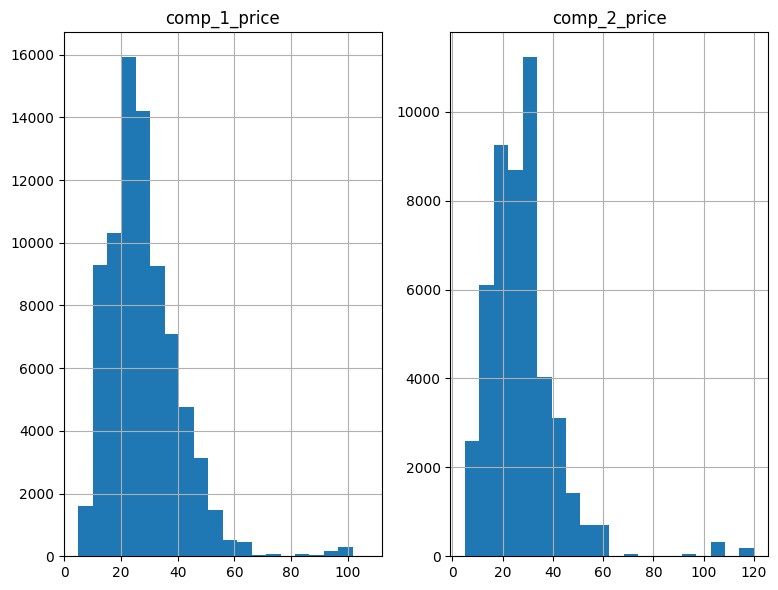

In [20]:
#understanding Competitor 1 and 2 variables
retail_df[['comp_1_price','comp_2_price']].hist(bins=20, figsize=(8, 6))
plt.tight_layout()
plt.show()

In [21]:
#find percentage of entries within each bin to distrubute the missing number according to data distrubution
#this way we won't have a massive increase in one bin and alter the composition of the data.
bin_width = (max(retail_df['comp_1_price']) - min(retail_df['comp_1_price'])) / 20
bin_edges = np.arange(0, round(max(retail_df['comp_1_price'])+ bin_width), round(bin_width))
print(bin_edges)

[  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100 105 110]


In [22]:
#find the percentages of entries in each bin for comp_1_price

#create a dataframe to show bins, counts & Percentages
bin_information= pd.DataFrame(columns=['bin_start', 'bin_end', 'count', 'percentage'])

#make 1st column the start of each bind
bin_information['bin_start'] = bin_edges[:-1]
#make 2nd column the end of each bin
bin_information['bin_end'] = bin_edges[1:]

#3d column is count of entries in that bin
bin_counts = retail_df['comp_1_price'].groupby(pd.cut(retail_df['comp_1_price'], bin_edges)).count()
count = bin_counts.values
bin_information['count'] = count

#4th column is bin percentages

missing_count= retail_df['comp_1_price'].isnull().sum()
non_missing_values= len(retail_df['comp_1_price']) - missing_count

bin_percentages= np.round(count/(non_missing_values) * 100, 2)
bin_information['percentage'] = bin_percentages

bin_information

<ipython-input-22-5c21b4d92065>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = retail_df['comp_1_price'].groupby(pd.cut(retail_df['comp_1_price'], bin_edges)).count()


,bin_start,bin_end,count,percentage
0,0,5,7,0.01
1,5,10,2376,3.02
2,10,15,8481,10.77
3,15,20,10152,12.89
4,20,25,15522,19.71
5,25,30,14598,18.54
6,30,35,8969,11.39
7,35,40,7044,8.95
8,40,45,4917,6.25
9,45,50,3159,4.01


In [23]:
bin_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bin_start   22 non-null     int64  
 1   bin_end     22 non-null     int64  
 2   count       22 non-null     int64  
 3   percentage  22 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 836.0 bytes


In [24]:
#assign those to their respective column within the bins
bin_information['New Entries'] = ((bin_information['percentage'] / 100) * missing_count).round()
bin_information

,bin_start,bin_end,count,percentage,New Entries
0,0,5,7,0.01,4.0
1,5,10,2376,3.02,1331.0
2,10,15,8481,10.77,4746.0
3,15,20,10152,12.89,5680.0
4,20,25,15522,19.71,8686.0
5,25,30,14598,18.54,8170.0
6,30,35,8969,11.39,5019.0
7,35,40,7044,8.95,3944.0
8,40,45,4917,6.25,2754.0
9,45,50,3159,4.01,1767.0


In [25]:
#count of imputed values is 7 lower than what is missing
#adding 7 to the bin with the max percentage
bin_information.loc[bin_information['percentage'].idxmax(), 'New Entries'] += 7
bin_information

,bin_start,bin_end,count,percentage,New Entries
0,0,5,7,0.01,4.0
1,5,10,2376,3.02,1331.0
2,10,15,8481,10.77,4746.0
3,15,20,10152,12.89,5680.0
4,20,25,15522,19.71,8693.0
5,25,30,14598,18.54,8170.0
6,30,35,8969,11.39,5019.0
7,35,40,7044,8.95,3944.0
8,40,45,4917,6.25,2754.0
9,45,50,3159,4.01,1767.0


In [26]:
#divided missing values into the bins occurding to their percentages

#list to hold computed values
inputed_values = []

for _, row in bin_information.iterrows():
    count = int(row['New Entries'])
    if count > 0:
      start = row['bin_start']
      end = row['bin_end']

      #make up random number to satisfy the count number
      inputed_values.extend(np.random.uniform(start, end, count))

len(inputed_values)

44069

In [27]:
retail_df.loc[retail_df['comp_1_price'].isnull(), 'comp_1_price'] = inputed_values[:missing_count]

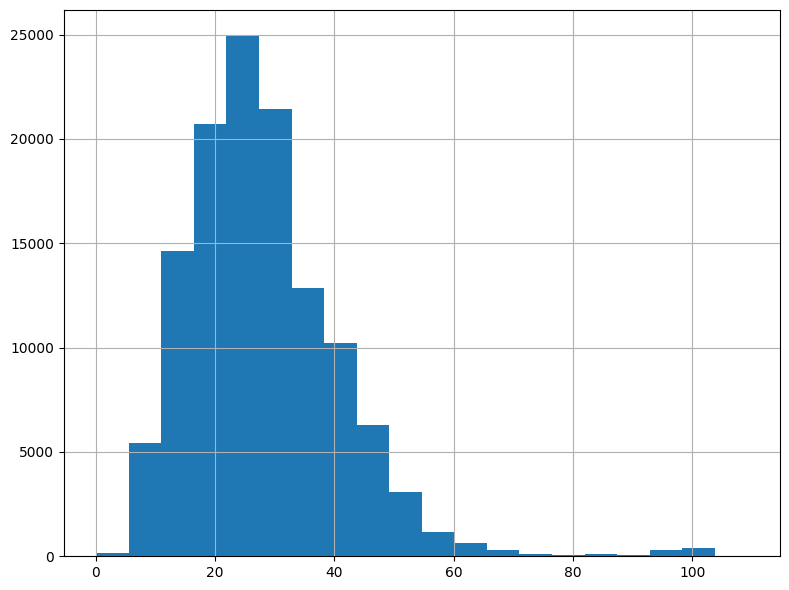

In [28]:
#check comp_1_price distribution after fixing missing values
retail_df['comp_1_price'].hist(bins=20, figsize=(8, 6))
plt.tight_layout()
plt.show()

Comp_2_price Missing Values Code

In [29]:
#find the percentages of entries in each bin for comp_2_price

#create a dataframe to show bins, counts & Percentages
bin2_information= pd.DataFrame(columns=['bin_start', 'bin_end', 'count', 'percentage'])

#make 1st column the start of each bind
bin2_information['bin_start'] = bin_edges[:-1]
#make 2nd column the end of each bin
bin2_information['bin_end'] = bin_edges[1:]

#3d column is count of entries in that bin
bin2_counts = retail_df['comp_2_price'].groupby(pd.cut(retail_df['comp_2_price'], bin_edges)).count()
count = bin2_counts.values
bin2_information['count'] = count

#4th column is bin percentages

missing2_count= retail_df['comp_2_price'].isnull().sum()
non2_missing_values= len(retail_df['comp_2_price']) - missing_count

bin2_percentages= np.round(count/(non2_missing_values) * 100, 2)
bin2_information['percentage'] = bin_percentages

bin2_information

<ipython-input-29-dd151a999d00>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin2_counts = retail_df['comp_2_price'].groupby(pd.cut(retail_df['comp_2_price'], bin_edges)).count()


,bin_start,bin_end,count,percentage
0,0,5,147,0.01
1,5,10,2220,3.02
2,10,15,4952,10.77
3,15,20,6825,12.89
4,20,25,8950,19.71
5,25,30,10478,18.54
6,30,35,5831,11.39
7,35,40,3181,8.95
8,40,45,2400,6.25
9,45,50,1308,4.01


In [30]:
bin2_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bin_start   22 non-null     int64  
 1   bin_end     22 non-null     int64  
 2   count       22 non-null     int64  
 3   percentage  22 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 836.0 bytes


In [31]:
#assign those to their respective column within the bins
bin2_information['New Entries'] = ((bin2_information['percentage'] / 100) * missing2_count).round()
bin2_information

,bin_start,bin_end,count,percentage,New Entries
0,0,5,147,0.01,7.0
1,5,10,2220,3.02,2245.0
2,10,15,4952,10.77,8006.0
3,15,20,6825,12.89,9582.0
4,20,25,8950,19.71,14652.0
5,25,30,10478,18.54,13782.0
6,30,35,5831,11.39,8467.0
7,35,40,3181,8.95,6653.0
8,40,45,2400,6.25,4646.0
9,45,50,1308,4.01,2981.0


In [32]:
print(bin2_information['New Entries'].sum(), missing2_count)

74330.0 74336


In [33]:
#count of imputed values is 6 lower than what is missing
#adding 6 to the bin with the max percentage
bin2_information.loc[bin2_information['percentage'].idxmax(), 'New Entries'] += 6
bin2_information

,bin_start,bin_end,count,percentage,New Entries
0,0,5,147,0.01,7.0
1,5,10,2220,3.02,2245.0
2,10,15,4952,10.77,8006.0
3,15,20,6825,12.89,9582.0
4,20,25,8950,19.71,14658.0
5,25,30,10478,18.54,13782.0
6,30,35,5831,11.39,8467.0
7,35,40,3181,8.95,6653.0
8,40,45,2400,6.25,4646.0
9,45,50,1308,4.01,2981.0


In [34]:
print(bin2_information['New Entries'].sum(), missing2_count)

74336.0 74336


In [35]:
#divided missing values into the bins occurding to their percentages

#list to hold computed values
inputed2_values = []

for _, row in bin2_information.iterrows():
    count = int(row['New Entries'])
    if count > 0:
      start = row['bin_start']
      end = row['bin_end']

      #make up random number to satisfy the count number
      inputed2_values.extend(np.random.uniform(start, end, count))

len(inputed2_values)

74336

In [36]:
retail_df.loc[retail_df['comp_2_price'].isnull(), 'comp_2_price'] = inputed2_values[:missing2_count]

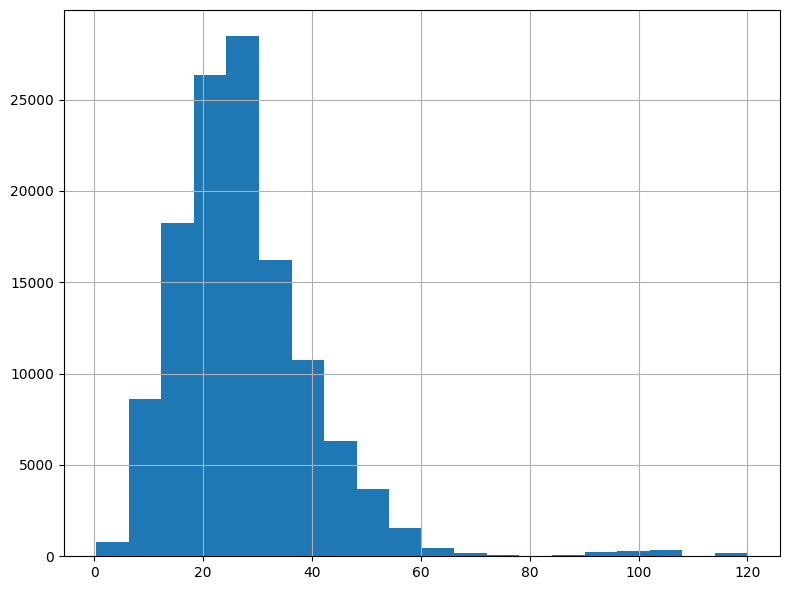

In [37]:
#check comp_2_price distribution after fixing missing values
retail_df['comp_2_price'].hist(bins=20, figsize=(8, 6))
plt.tight_layout()
plt.show()

In [38]:
#double check missing values
missing_summary = pd.DataFrame({
    'Missing Values': retail_df.isnull().sum(),
    'Percentage Missing': retail_df.isnull().mean() * 100
})

# Filter out variables with no missing values (optional)
missing_summary = missing_summary[missing_summary['Missing Values'] > 0]

# Sort by percentage missing (optional)
missing_summary = missing_summary.sort_values(by='Percentage Missing', ascending=False)

print(missing_summary)

Empty DataFrame
Columns: [Missing Values, Percentage Missing]
Index: []


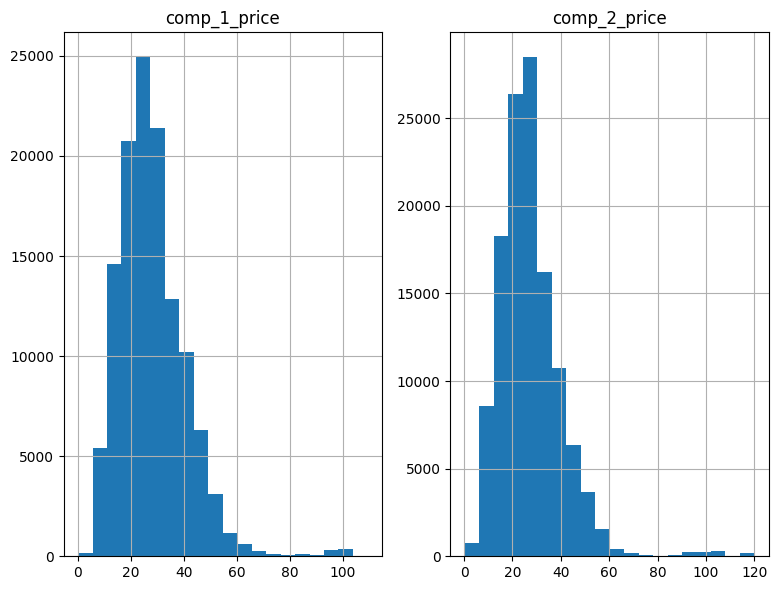

In [39]:
#no missing data exists, checking the distribution of the two variables
retail_df[['comp_1_price','comp_2_price']].hist(bins=20, figsize=(8, 6))
plt.tight_layout()
plt.show()

Code to Remove Outliers

In [40]:
# Selecting numeric columns
numeric_df = retail_df.select_dtypes(include=['number'])

# Detecting outliers using IQR
def detect_outliers_iqr(data):
    outlier_counts = {}
    for column in data.columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        outlier_counts[column] = len(outliers)
    return pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier Count']).sort_values(by='Outlier Count', ascending=False)

# Run the function and print results
outlier_summary = detect_outliers_iqr(numeric_df)
print("\n=== Outlier Summary- Pre-Analysis ===\n")
print(outlier_summary)


=== Outlier Summary- Pre-Analysis ===

               Outlier Count
profit                 14798
adspend                14464
fba                    11774
sales                  11623
reffee                 11581
unitsordered           11558
cogs                   11258
max_price               6281
min_price               5181
price                   3805
comp_2_price            3121
comp_1_price            2300
Wood_Price                 0
Plastic_Price              0


In [41]:
#outlier count is high, will focus on one specific product type: envelopes
# make a dataframe of products
products_df = pd.DataFrame(retail_df['sku'].drop_duplicates())
print(products_df)

                                  sku
0                     Envelopes SKU 4
554                   Envelopes SKU 9
1108                 Envelopes SKU 11
1659    Classification Folders SKU 16
2207    Classification Folders SKU 14
...                               ...
120039   Classification Folders SKU 8
120592                Envelopes SKU 2
121146            File Folders SKU 58
121693               Envelopes SKU 10
122247  Classification Folders SKU 11

[227 rows x 1 columns]


In [42]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 227 entries, 0 to 122247
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sku     227 non-null    object
dtypes: object(1)
memory usage: 3.5+ KB


In [43]:
envelopes_df = products_df[products_df['sku'].str.contains('envelopes', case=False, na=False)][['sku']]
envelopes_df = envelopes_df.reset_index(drop=True)
envelopes_df

,sku
0,Envelopes SKU 4
1,Envelopes SKU 9
2,Envelopes SKU 11
3,Envelopes SKU 16
4,Envelopes SKU 18
5,Envelopes SKU 19
6,Envelopes SKU 20
7,Envelopes SKU 21
8,Envelopes SKU 22
9,Envelopes SKU 23


In [44]:
#dataset from retail_df that only keeps envelope in sku
retail_df = retail_df[retail_df['sku'].isin(envelopes_df['sku'])]
#reset index
retail_df = retail_df.reset_index(drop=True)
retail_df

,sku,salesdate,price,unitsordered,sales,cogs,fba,reffee,adspend,profit,comp_1_price,comp_2_price,min_price,max_price,Wood_Price,Plastic_Price
0,Envelopes SKU 4,2022-01-01,29.49,19,560.0,236.0,156.0,84.0,0.0,84.0,28.49,27.97,27.99,34.99,114.917,103.028
1,Envelopes SKU 4,2022-01-02,29.99,13,390.0,161.0,107.0,58.0,0.0,64.0,28.49,27.97,27.99,34.99,114.917,103.028
2,Envelopes SKU 4,2022-01-03,29.69,84,2494.0,1042.0,690.0,374.0,0.0,388.0,28.49,27.97,27.99,34.99,114.917,103.028
3,Envelopes SKU 4,2022-01-04,29.79,78,2324.0,968.0,641.0,349.0,0.0,366.0,28.49,27.97,27.99,34.99,114.917,103.028
4,Envelopes SKU 4,2022-01-05,29.79,83,2473.0,1030.0,682.0,371.0,0.0,390.0,28.49,27.97,27.99,34.99,114.917,103.028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18156,Envelopes SKU 10,2023-07-05,20.69,54,1117.0,374.0,410.0,168.0,59.0,106.0,20.98,17.13,19.99,26.99,112.068,91.199
18157,Envelopes SKU 10,2023-07-06,20.89,27,564.0,187.0,205.0,85.0,74.0,13.0,20.98,17.13,19.99,26.99,112.068,91.199
18158,Envelopes SKU 10,2023-07-07,20.89,17,355.0,118.0,129.0,53.0,60.0,-5.0,20.98,17.13,19.99,26.99,112.068,91.199
18159,Envelopes SKU 10,2023-07-08,20.99,12,252.0,83.0,91.0,38.0,45.0,-5.0,20.98,17.13,19.99,26.99,112.068,91.199


In [45]:
# Selecting numeric columns
numeric_df = retail_df.select_dtypes(include=['number'])

# Detecting outliers using IQR
def detect_outliers_iqr(data):
    outlier_counts = {}
    for column in data.columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        outlier_counts[column] = len(outliers)
    return pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier Count']).sort_values(by='Outlier Count', ascending=False)

# Run the function and print results
outlier_summary = detect_outliers_iqr(numeric_df)
print("\n=== Outlier Summary- Envelopes SKU Only ===\n")
print(outlier_summary)


=== Outlier Summary- Envelopes SKU Only ===

               Outlier Count
max_price               2758
min_price               2204
profit                  2161
adspend                 2047
price                   1850
sales                   1831
reffee                  1831
cogs                    1766
fba                     1714
unitsordered            1682
comp_2_price             510
comp_1_price             224
Wood_Price                 0
Plastic_Price              0


In [46]:
def redistribute_outliers_by_bins(df, column, bin_count=20):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    is_outlier = (retail_df[column] < lower_bound) | (retail_df[column] > upper_bound)
    inliers = retail_df.loc[~is_outlier, column]

    bin_edges = np.histogram_bin_edges(inliers, bins=bin_count)
    bin_counts, _ = np.histogram(inliers, bins=bin_edges)
    bin_percentages = bin_counts / bin_counts.sum()

    total_outliers = is_outlier.sum()
    missing_counts = (bin_percentages * total_outliers).round().astype(int)

    replacement_values = []
    for i in range(len(missing_counts)):
        count = missing_counts[i]
        if count > 0:
            start = bin_edges[i]
            end = bin_edges[i+1]
            values = np.random.uniform(start, end, count)
            replacement_values.extend(values)

    while len(replacement_values) < total_outliers:
            start = bin_edges[0]
            end = bin_edges[-1]
            replacement_values.extend(np.random.uniform(start, end, 1))

    retail_df.loc[is_outlier, column] = replacement_values[:total_outliers]

    return retail_df

In [47]:
outlier_columns = ['comp_1_price', 'comp_2_price','profit', 'adspend', 'fba', 'sales', 'reffee', 'cogs', 'max_price', 'min_price', 'price', 'unitsordered' ]

for column in outlier_columns:
    redistribute_outliers_by_bins(retail_df, column)

<ipython-input-46-7f139918a494>:32: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[np.float64(1.3336915446978657), np.float64(1.8994598487960832), np.float64(0.27562469680798884), np.float64(2.5559530400700288), np.float64(2.064262537077608), np.float64(3.1120678050250725), np.float64(4.078041045591638), np.float64(1.7893889808909242), np.float64(1.8094124197672496), np.float64(1.0982554872312178), np.float64(1.1369628068276125), np.float64(2.7251671388224454), np.float64(1.874176284889691), np.float64(2.3642445893329924), np.float64(3.66143044205683), np.float64(1.8585146206799674), np.float64(0.022682707510945675), np.float64(2.582600565778177), np.float64(3.3825943149090527), np.float64(1.289996574556567), np.float64(3.2401175541931373), np.float64(3.6670937269937545), np.float64(2.9774636675995363), np.float64(1.1044936542260102), np.float64(3.0842764528257796), np.float64(1.991312241069979), np.floa

In [48]:
#outlier count- double check
# Selecting numeric columns
numeric_df = retail_df.select_dtypes(include=['number'])

# Detecting outliers using IQR
def detect_outliers_iqr(data):
    outlier_counts = {}
    for column in data.columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        outlier_counts[column] = len(outliers)
    return pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier Count']).sort_values(by='Outlier Count', ascending=False)

# Run the function and print results
outlier_summary = detect_outliers_iqr(numeric_df)
print("\n=== Outlier Summary- Post-Analysis ===\n")
print(outlier_summary)


=== Outlier Summary- Post-Analysis ===

               Outlier Count
profit                  1276
max_price               1270
adspend                 1102
unitsordered             771
price                    699
fba                      663
cogs                     660
sales                    584
reffee                   581
comp_1_price               0
comp_2_price               0
min_price                  0
Wood_Price                 0
Plastic_Price              0


In [49]:
#one round of outlier analysis was performed to help tighten data proportionally

In [50]:
# List of numeric columns you'd like to make boxplots for
numeric_columns = retail_df.select_dtypes(include=['number']).columns.tolist()
print(numeric_columns)

['price', 'unitsordered', 'sales', 'cogs', 'fba', 'reffee', 'adspend', 'profit', 'comp_1_price', 'comp_2_price', 'min_price', 'max_price', 'Wood_Price', 'Plastic_Price']


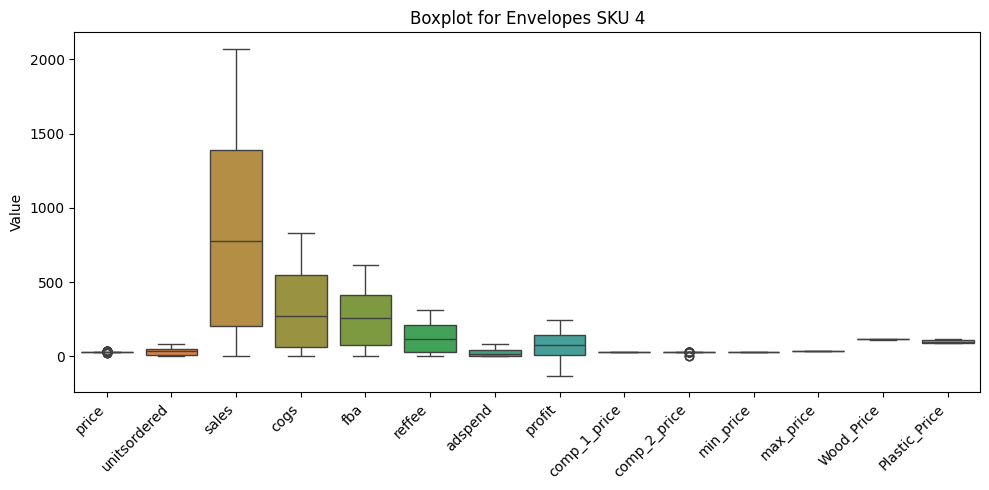

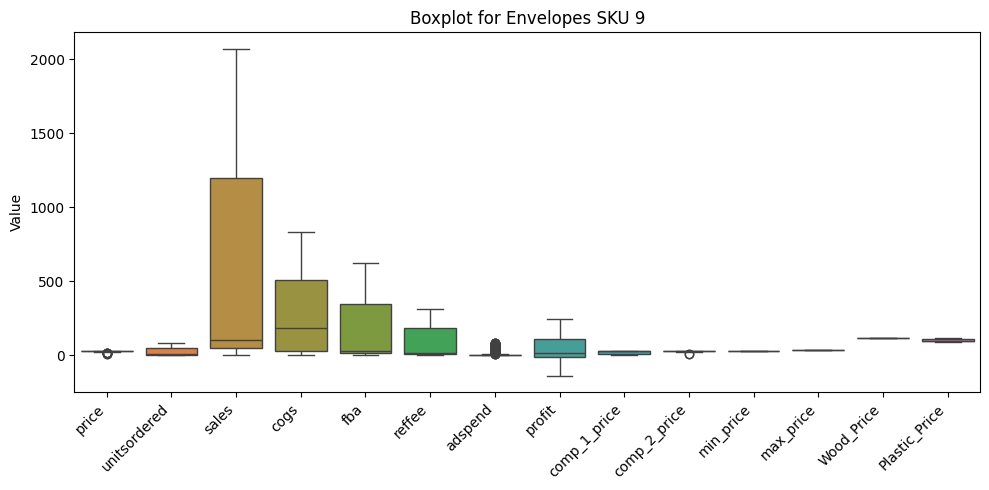

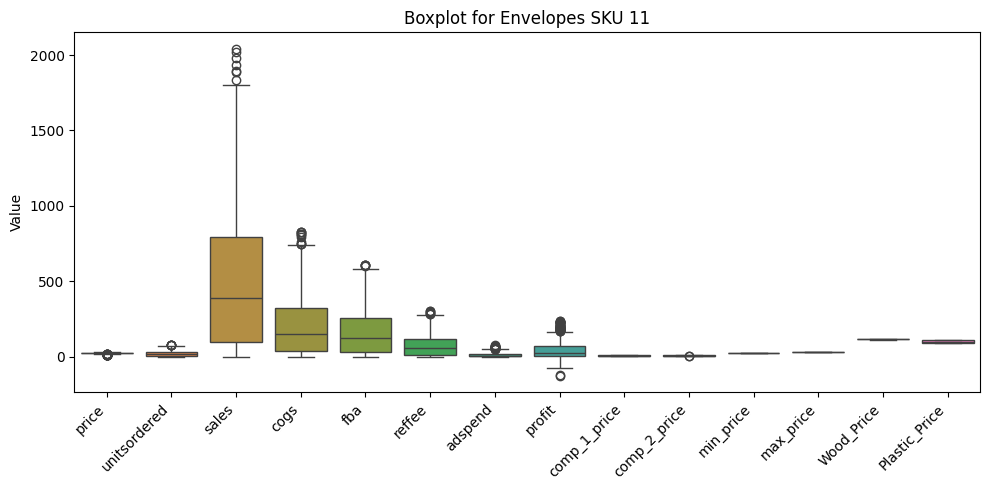

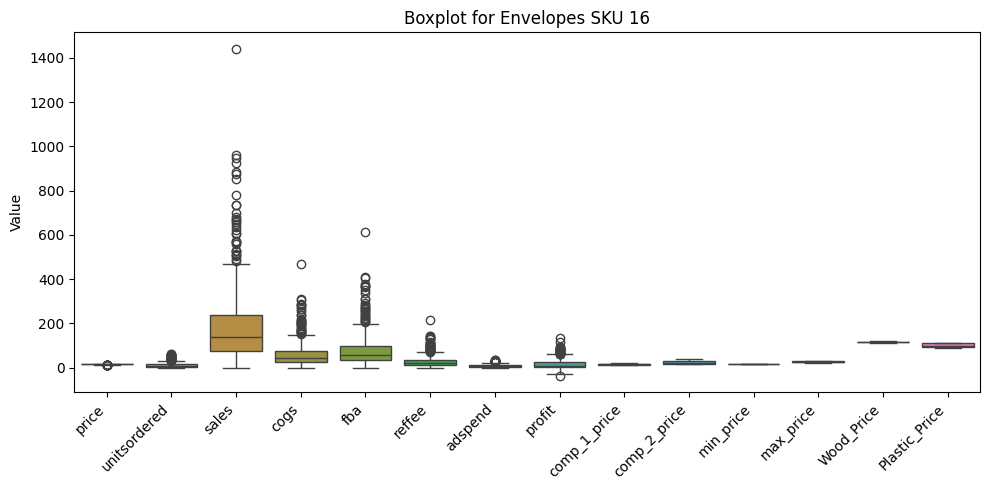

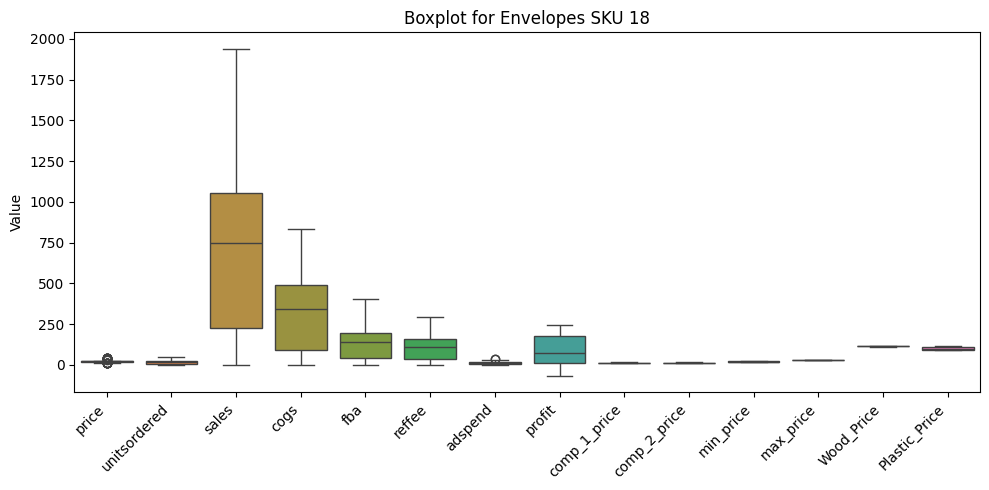

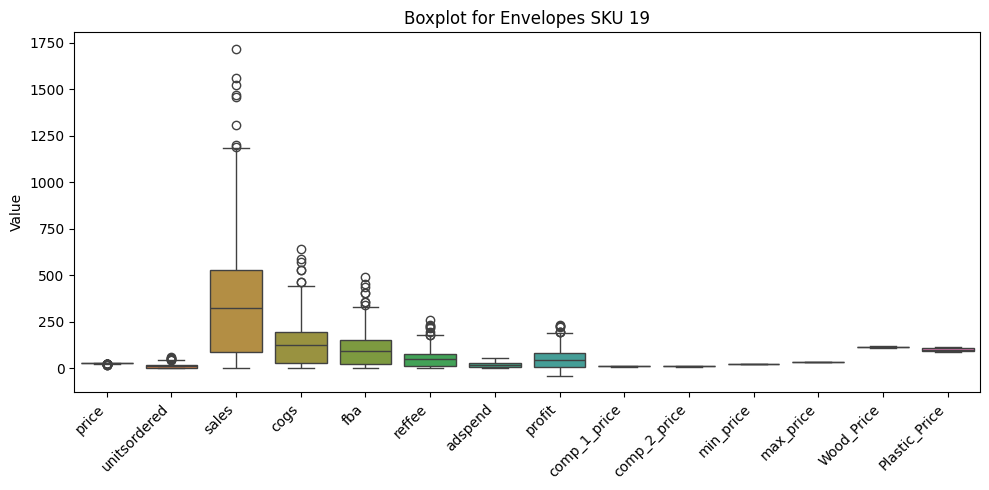

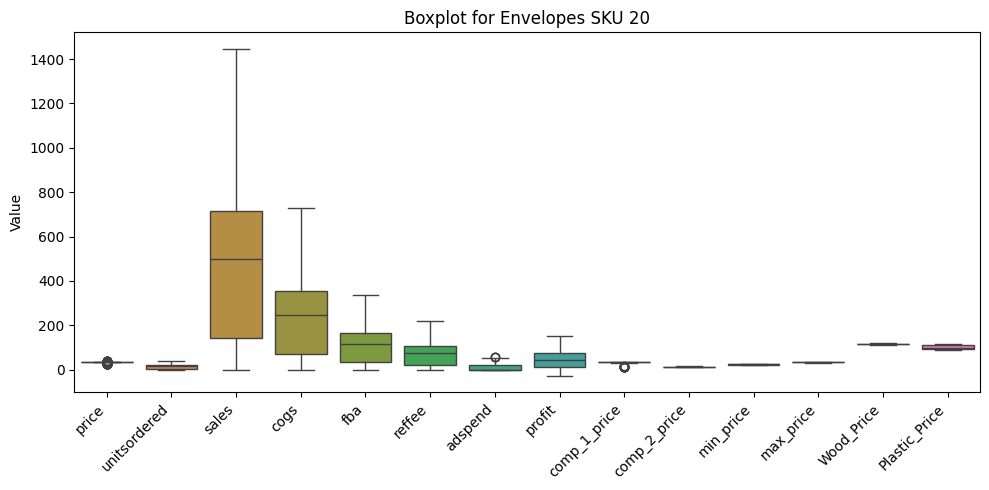

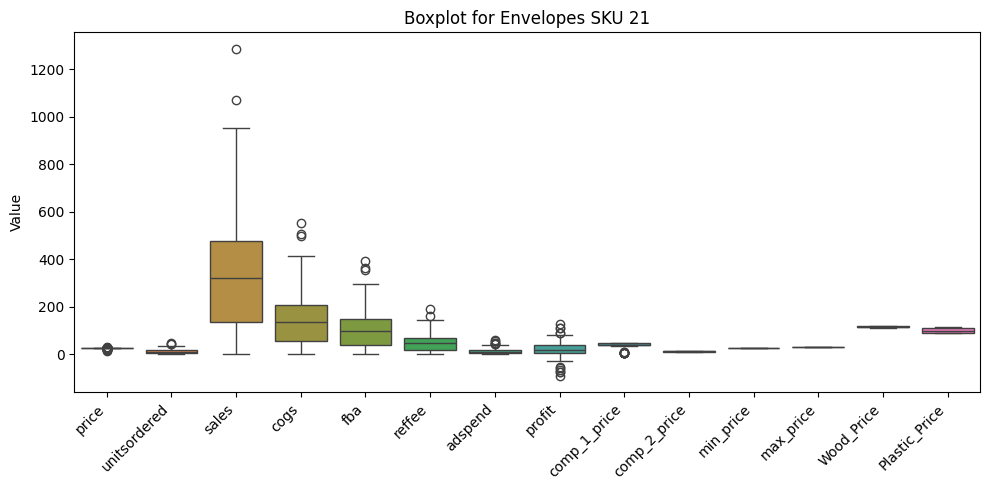

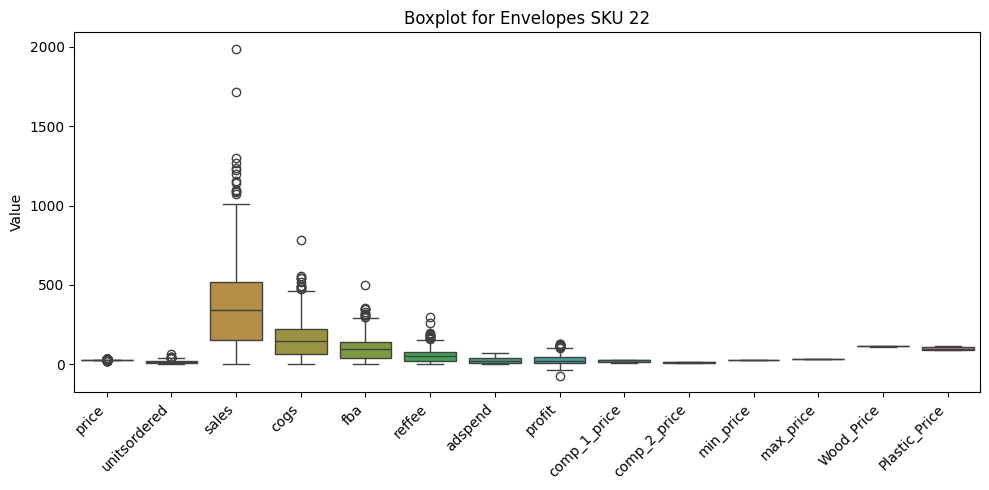

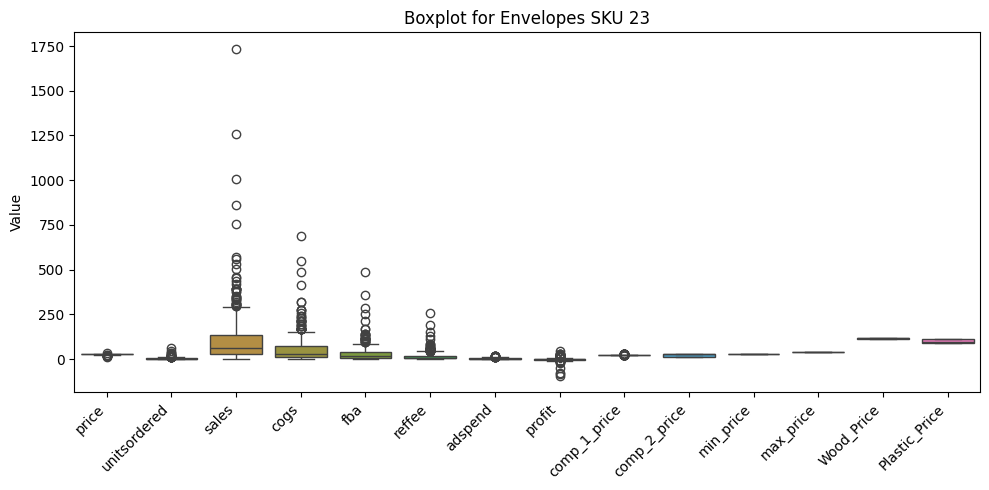

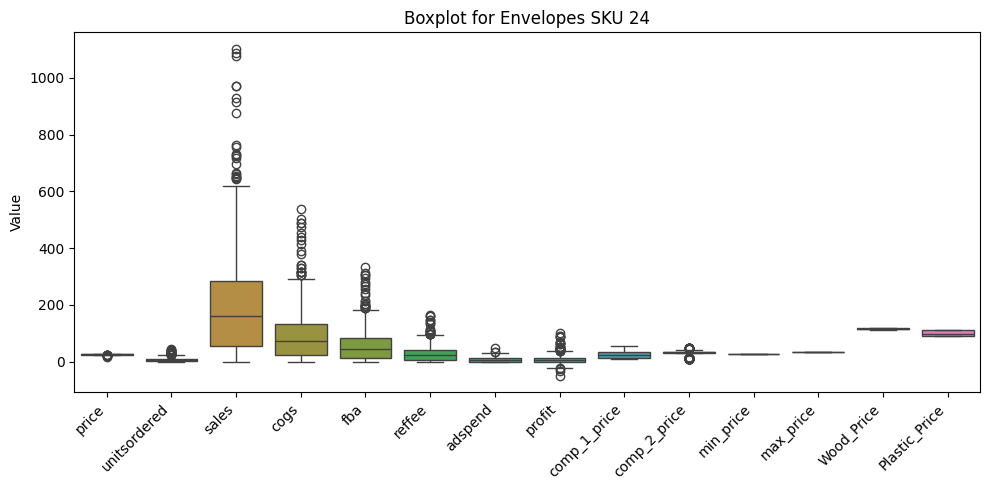

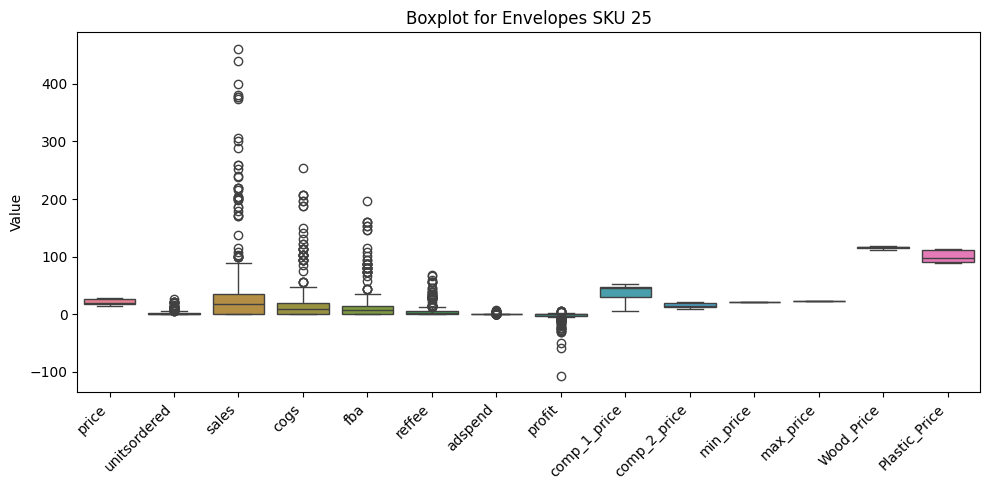

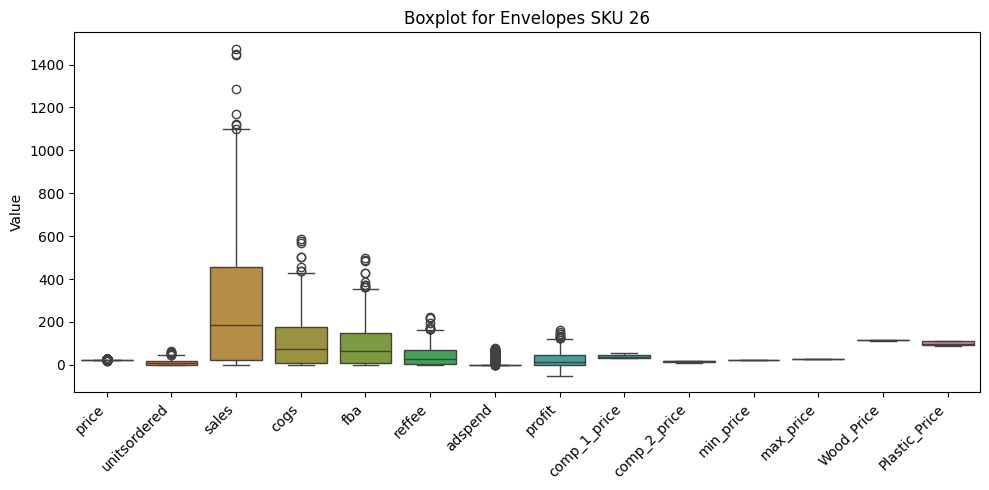

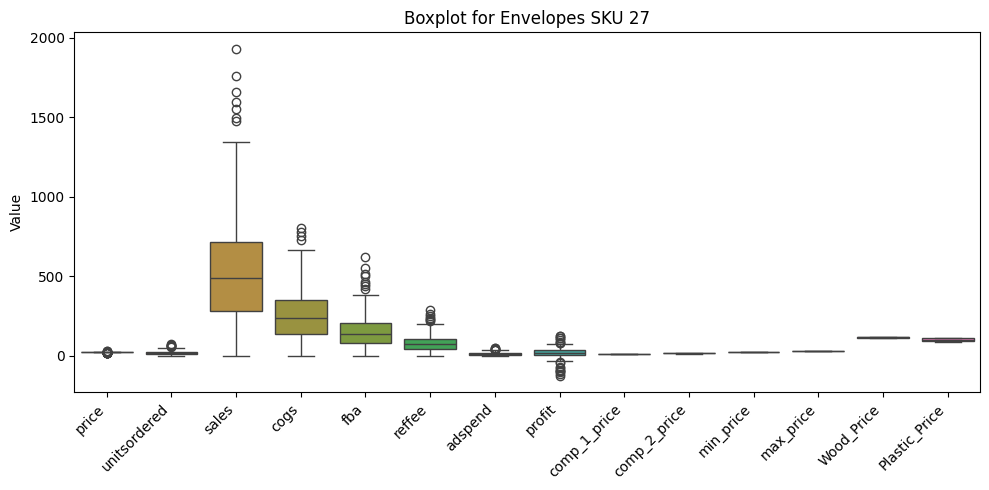

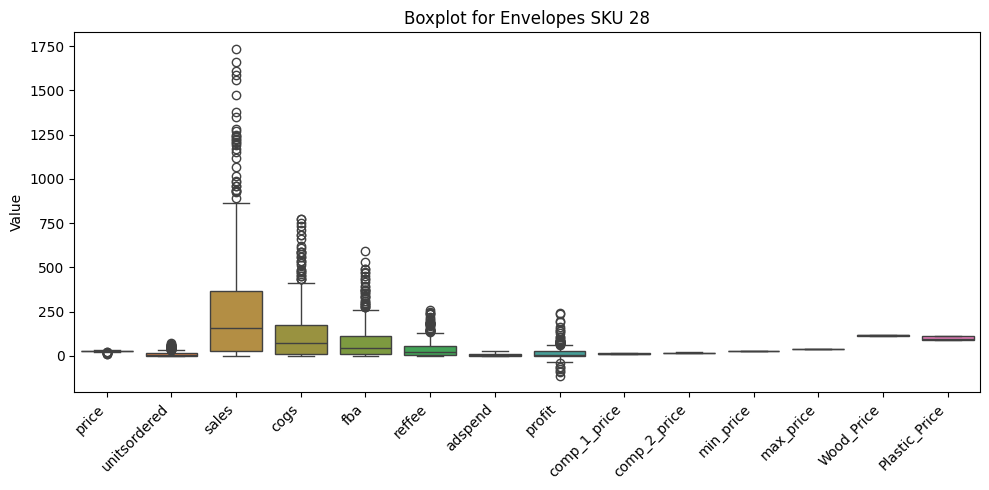

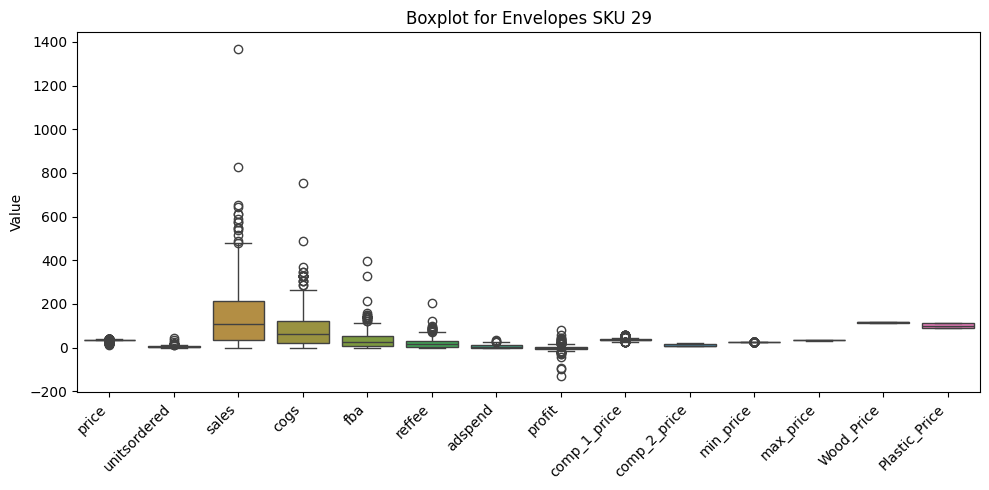

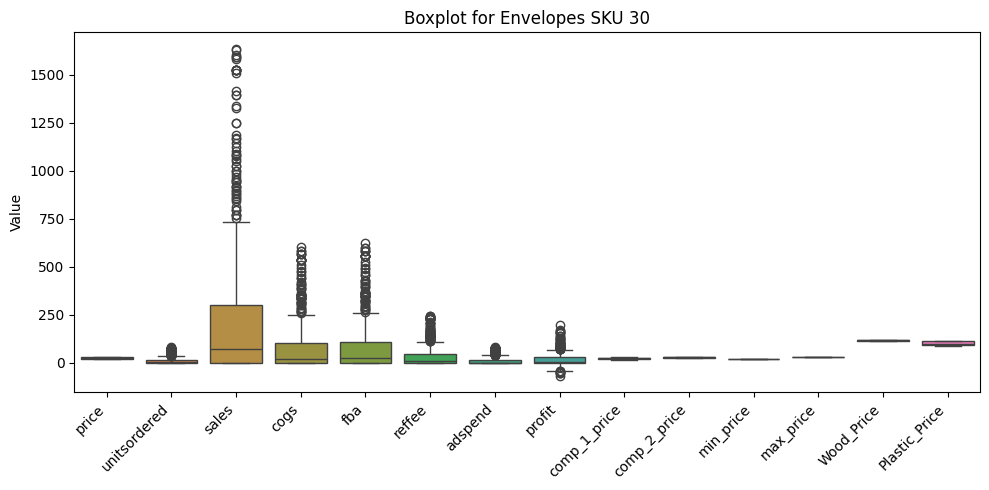

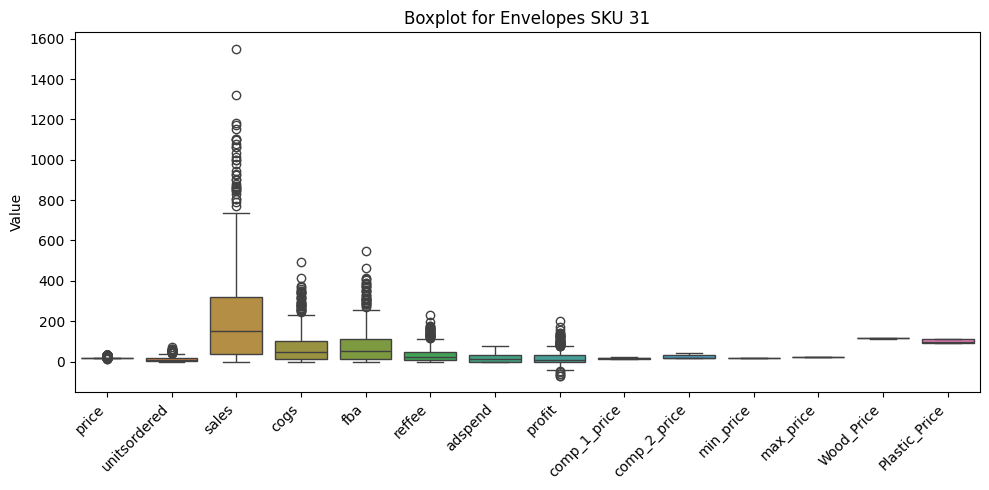

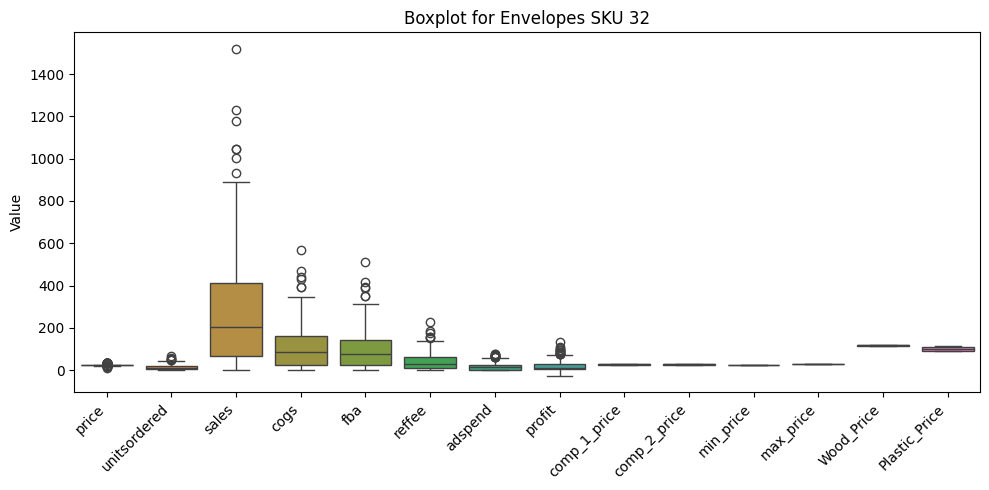

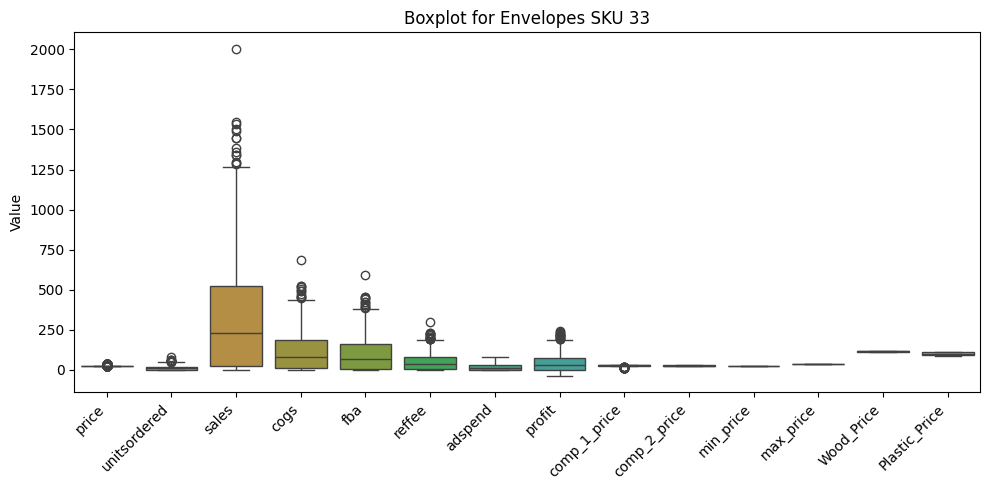

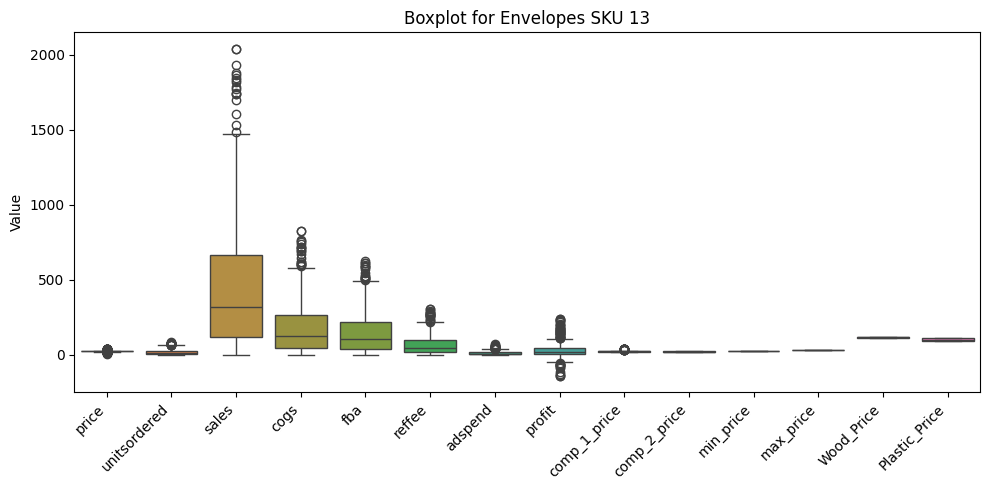

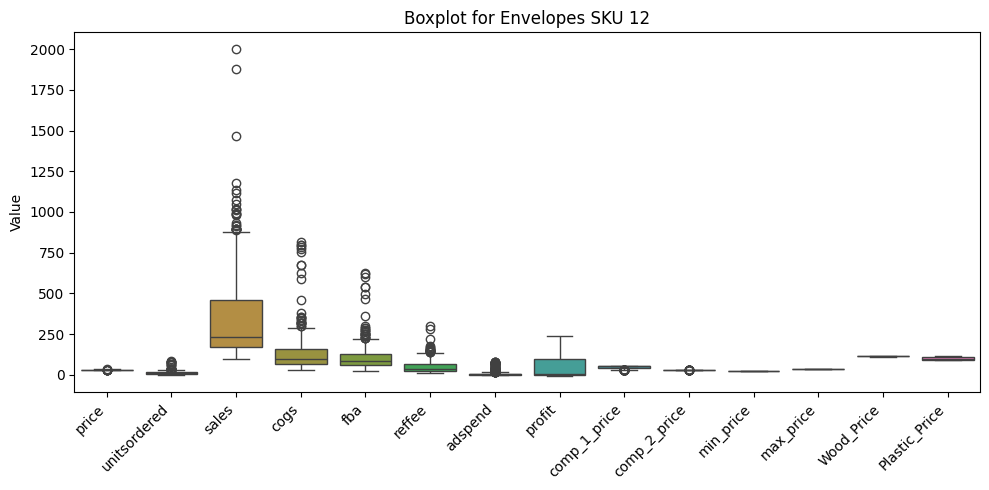

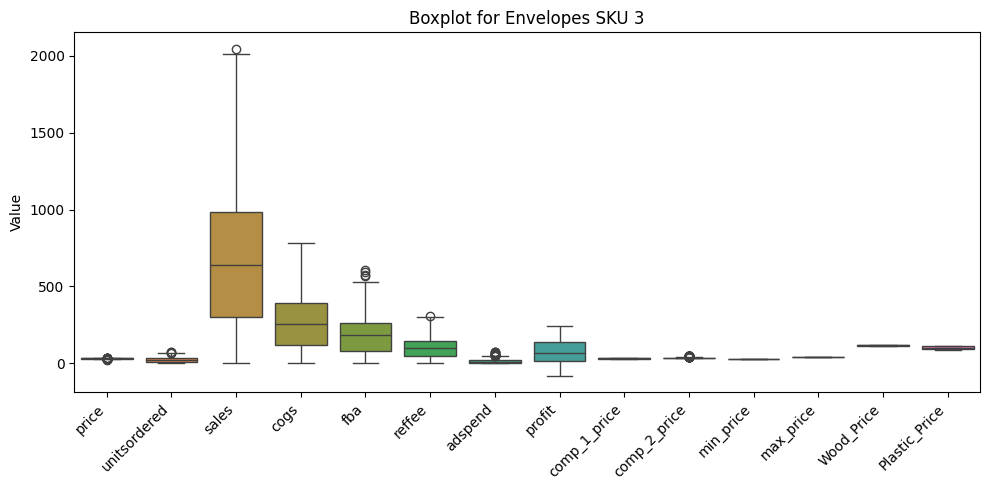

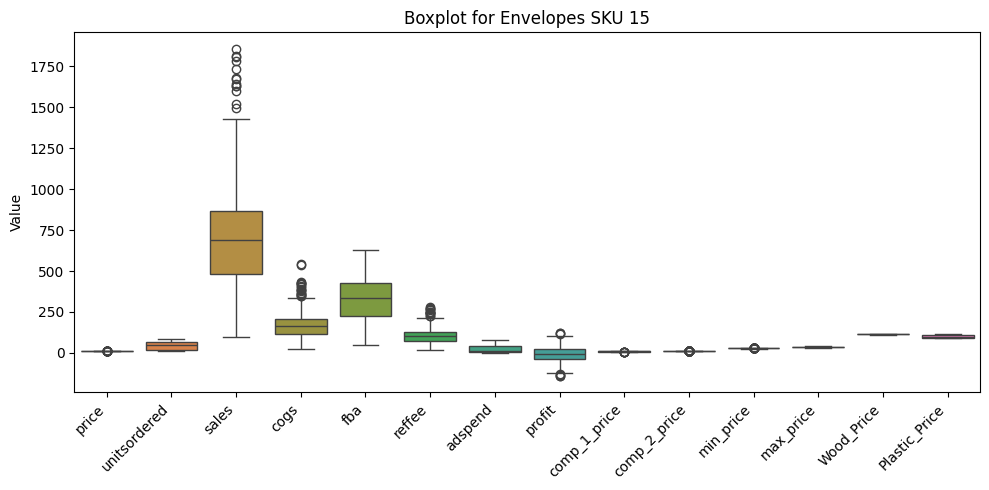

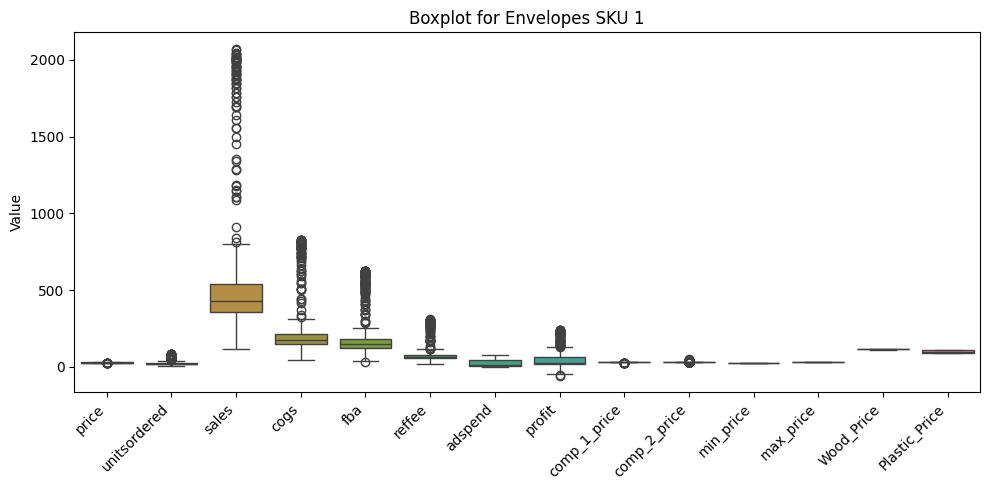

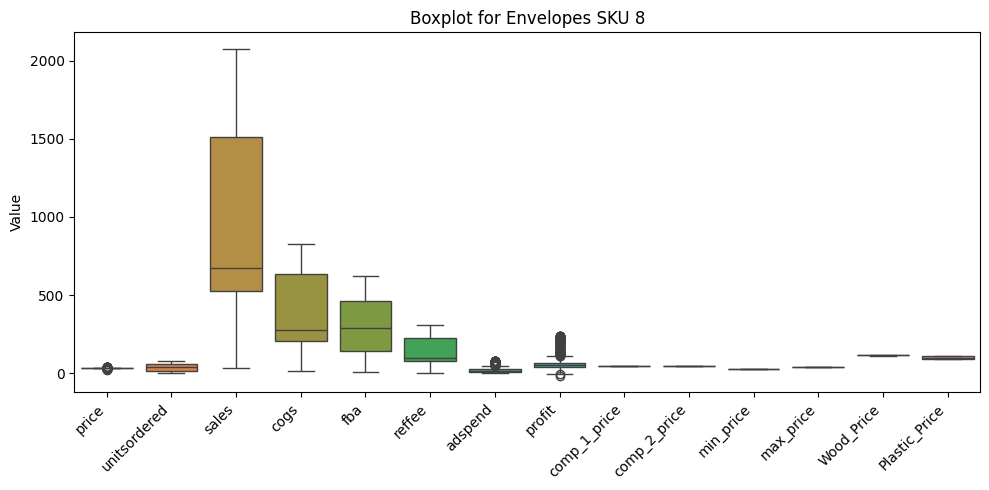

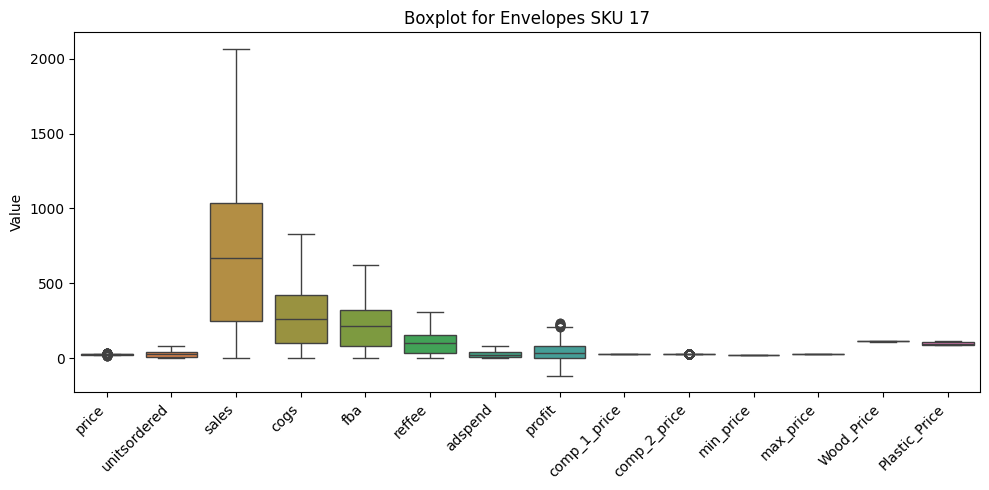

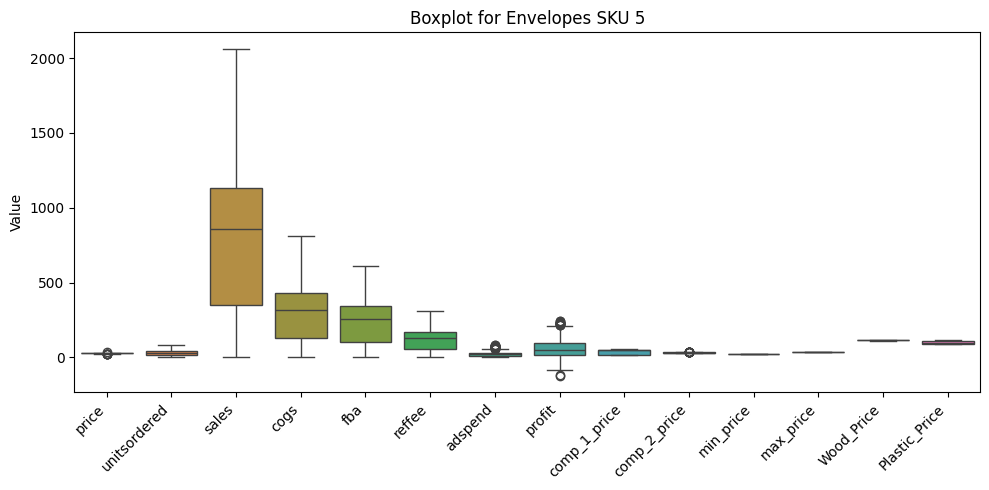

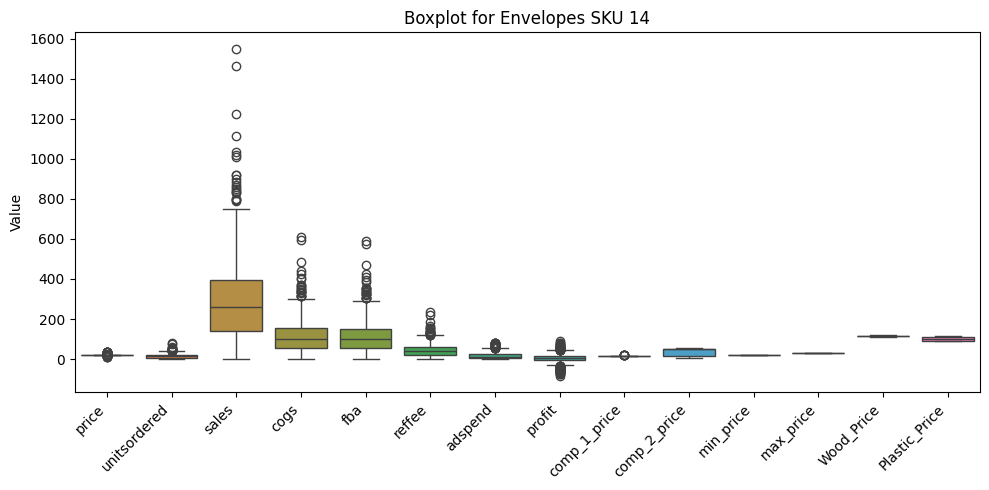

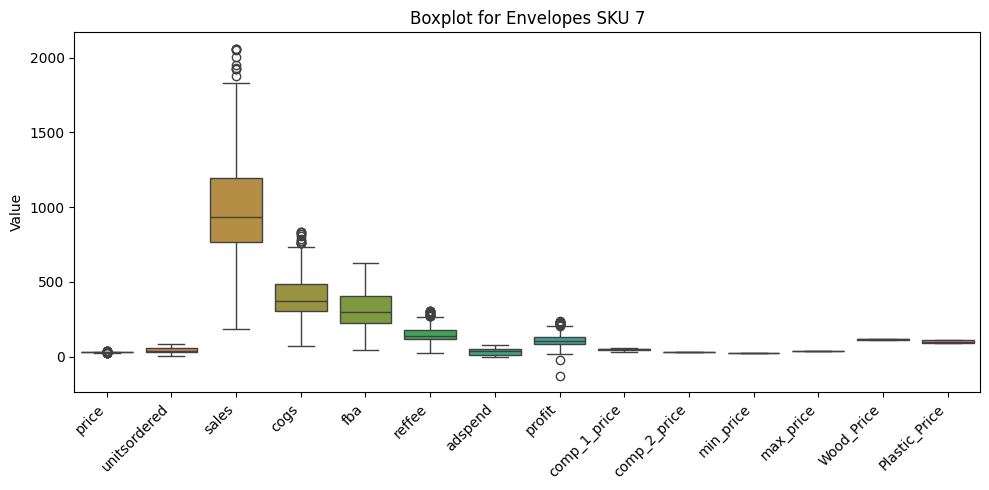

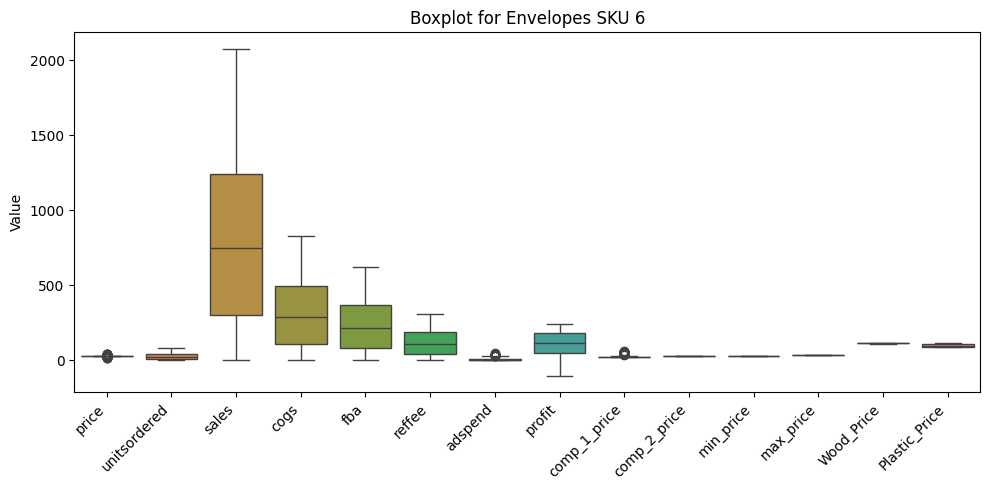

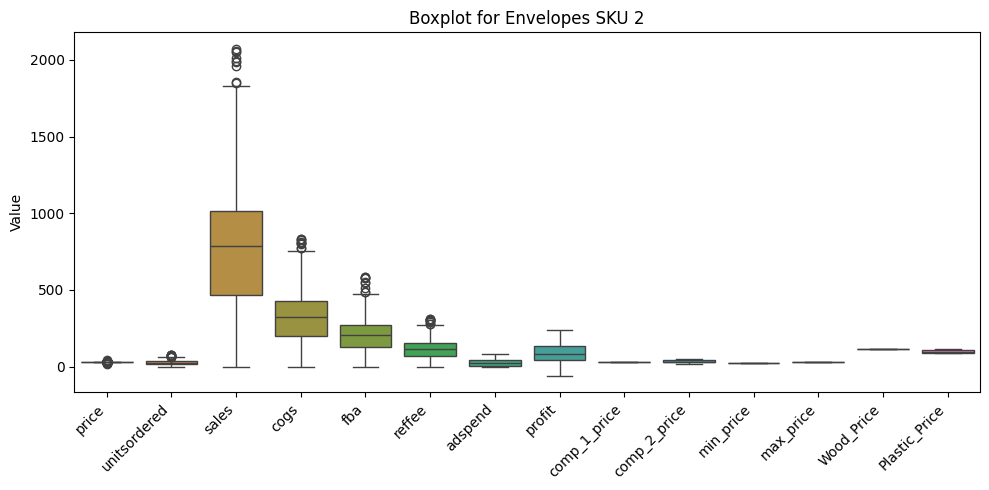

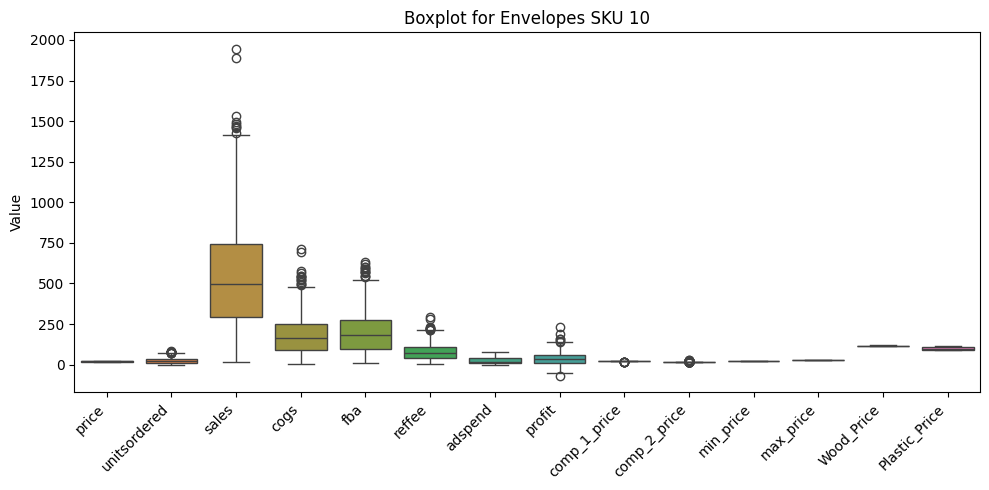

In [51]:
# Get the list of unique SKUs from products_df
products = envelopes_df['sku'].tolist()

for product in products:
    product_data = retail_df[retail_df['sku'] == product]

    # Plot boxplot for all selected numeric columns
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=product_data[numeric_columns])
    plt.title(f'Boxplot for {product}')
    plt.ylabel('Value')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [52]:
# Function to replace outliers with NaN using IQR (modifies numeric_df in place)
def replace_outliers_with_nan_inplace(data):
    numeric_data = data.select_dtypes(include=['number']) # Select only numeric columns
    for column in numeric_data.columns:
        Q1 = numeric_data[column].quantile(0.25)
        Q3 = numeric_data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Replace outliers with NaN in place
        data.loc[(data[column] < lower_bound) | (data[column] > upper_bound), column] = pd.NA

# Apply changes directly to retail_df
replace_outliers_with_nan_inplace(retail_df)

In [53]:
#check replacement of NaN
retail_df.head()

,sku,salesdate,price,unitsordered,sales,cogs,fba,reffee,adspend,profit,comp_1_price,comp_2_price,min_price,max_price,Wood_Price,Plastic_Price
0,Envelopes SKU 4,2022-01-01,29.49,19.000000,560.000000,236.000000,156.000000,84.000000,0.0,84.0,28.49,27.97,27.99,34.99,114.917,103.028
1,Envelopes SKU 4,2022-01-02,29.99,13.000000,390.000000,161.000000,107.000000,58.000000,0.0,64.0,28.49,27.97,27.99,34.99,114.917,103.028
2,Envelopes SKU 4,2022-01-03,29.69,1.333692,78.063612,27.433910,18.406927,5.870756,0.0,NaN,28.49,27.97,27.99,34.99,114.917,103.028
3,Envelopes SKU 4,2022-01-04,29.79,NaN,74.641575,41.107639,17.665600,4.009645,0.0,NaN,28.49,27.97,27.99,34.99,114.917,103.028
4,Envelopes SKU 4,2022-01-05,29.79,1.899460,15.724311,0.475183,30.396538,14.518868,0.0,NaN,28.49,27.97,27.99,34.99,114.917,103.028


In [54]:
# Select numeric columns
numeric_data = retail_df.select_dtypes(include=['number'])

# Now use numeric_data to fill NaN values with the mean
retail_df[numeric_data.columns] = retail_df[numeric_data.columns].apply(lambda col: col.fillna(col.mean()))

In [55]:
retail_df.head()

,sku,salesdate,price,unitsordered,sales,cogs,fba,reffee,adspend,profit,comp_1_price,comp_2_price,min_price,max_price,Wood_Price,Plastic_Price
0,Envelopes SKU 4,2022-01-01,29.49,19.000000,560.000000,236.000000,156.000000,84.000000,0.0,84.000000,28.49,27.97,27.99,34.99,114.917,103.028
1,Envelopes SKU 4,2022-01-02,29.99,13.000000,390.000000,161.000000,107.000000,58.000000,0.0,64.000000,28.49,27.97,27.99,34.99,114.917,103.028
2,Envelopes SKU 4,2022-01-03,29.69,1.333692,78.063612,27.433910,18.406927,5.870756,0.0,30.709238,28.49,27.97,27.99,34.99,114.917,103.028
3,Envelopes SKU 4,2022-01-04,29.79,16.863516,74.641575,41.107639,17.665600,4.009645,0.0,30.709238,28.49,27.97,27.99,34.99,114.917,103.028
4,Envelopes SKU 4,2022-01-05,29.79,1.899460,15.724311,0.475183,30.396538,14.518868,0.0,30.709238,28.49,27.97,27.99,34.99,114.917,103.028


In [56]:
#double checking outliets
numeric_data = retail_df.select_dtypes(include=['number'])

# Detecting outliers using IQR
def detect_outliers_iqr(data):
    outlier_counts = {}
    for column in data.columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        outlier_counts[column] = len(outliers)
    return pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier Count']).sort_values(by='Outlier Count', ascending=False)

# Run the function and print results
outlier_summary = detect_outliers_iqr(numeric_data)
print("\n=== Outlier Summary- Post-Post Analysis ===\n")
print(outlier_summary)


=== Outlier Summary- Post-Post Analysis ===

               Outlier Count
max_price               1307
profit                   969
adspend                  608
unitsordered             428
fba                      362
cogs                     339
reffee                   244
sales                    243
price                    104
comp_1_price               0
comp_2_price               0
min_price                  0
Wood_Price                 0
Plastic_Price              0


In [57]:
#number of outliers is acceptable, continue with the dataset

In [58]:
# New column for Cogs using Wood_price : new column will be original cogs - Wood_price
retail_df['cogs-Wood_Price'] = retail_df['cogs'] - retail_df['Wood_Price']

In [59]:
# New column for Cogs using plastic_price : new column will be original cogs - plastic_price
retail_df['cogs-Plastic_Price'] = retail_df['cogs'] - retail_df['Plastic_Price']

In [60]:
retail_df.head()

,sku,salesdate,price,unitsordered,sales,cogs,fba,reffee,adspend,profit,comp_1_price,comp_2_price,min_price,max_price,Wood_Price,Plastic_Price,cogs-Wood_Price,cogs-Plastic_Price
0,Envelopes SKU 4,2022-01-01,29.49,19.000000,560.000000,236.000000,156.000000,84.000000,0.0,84.000000,28.49,27.97,27.99,34.99,114.917,103.028,121.083000,132.972000
1,Envelopes SKU 4,2022-01-02,29.99,13.000000,390.000000,161.000000,107.000000,58.000000,0.0,64.000000,28.49,27.97,27.99,34.99,114.917,103.028,46.083000,57.972000
2,Envelopes SKU 4,2022-01-03,29.69,1.333692,78.063612,27.433910,18.406927,5.870756,0.0,30.709238,28.49,27.97,27.99,34.99,114.917,103.028,-87.483090,-75.594090
3,Envelopes SKU 4,2022-01-04,29.79,16.863516,74.641575,41.107639,17.665600,4.009645,0.0,30.709238,28.49,27.97,27.99,34.99,114.917,103.028,-73.809361,-61.920361
4,Envelopes SKU 4,2022-01-05,29.79,1.899460,15.724311,0.475183,30.396538,14.518868,0.0,30.709238,28.49,27.97,27.99,34.99,114.917,103.028,-114.441817,-102.552817


In [61]:
columns_to_fix = ['unitsordered', 'sales', 'cogs', 'fba', 'reffee']

for col in columns_to_fix:
    retail_df[col] = retail_df[col].apply(lambda x: round(x))

retail_df

,sku,salesdate,price,unitsordered,sales,cogs,fba,reffee,adspend,profit,comp_1_price,comp_2_price,min_price,max_price,Wood_Price,Plastic_Price,cogs-Wood_Price,cogs-Plastic_Price
0,Envelopes SKU 4,2022-01-01,29.49,19,560,236,156,84,0.000000,84.000000,28.49,27.97,27.99,34.99,114.917,103.028,121.083000,132.972000
1,Envelopes SKU 4,2022-01-02,29.99,13,390,161,107,58,0.000000,64.000000,28.49,27.97,27.99,34.99,114.917,103.028,46.083000,57.972000
2,Envelopes SKU 4,2022-01-03,29.69,1,78,27,18,6,0.000000,30.709238,28.49,27.97,27.99,34.99,114.917,103.028,-87.483090,-75.594090
3,Envelopes SKU 4,2022-01-04,29.79,17,75,41,18,4,0.000000,30.709238,28.49,27.97,27.99,34.99,114.917,103.028,-73.809361,-61.920361
4,Envelopes SKU 4,2022-01-05,29.79,2,16,0,30,15,0.000000,30.709238,28.49,27.97,27.99,34.99,114.917,103.028,-114.441817,-102.552817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18156,Envelopes SKU 10,2023-07-05,20.69,54,1117,374,410,168,12.052044,106.000000,20.98,17.13,19.99,26.99,112.068,91.199,261.932000,282.801000
18157,Envelopes SKU 10,2023-07-06,20.89,27,564,187,205,85,12.052044,13.000000,20.98,17.13,19.99,26.99,112.068,91.199,74.932000,95.801000
18158,Envelopes SKU 10,2023-07-07,20.89,17,355,118,129,53,12.052044,-5.000000,20.98,17.13,19.99,26.99,112.068,91.199,5.932000,26.801000
18159,Envelopes SKU 10,2023-07-08,20.99,12,252,83,91,38,45.000000,-5.000000,20.98,17.13,19.99,26.99,112.068,91.199,-29.068000,-8.199000


In [62]:
columns_to_fix = ['profit', 'adspend']

for col in columns_to_fix:
    retail_df[col] = retail_df[col].apply(lambda x: round(x,2))

retail_df

,sku,salesdate,price,unitsordered,sales,cogs,fba,reffee,adspend,profit,comp_1_price,comp_2_price,min_price,max_price,Wood_Price,Plastic_Price,cogs-Wood_Price,cogs-Plastic_Price
0,Envelopes SKU 4,2022-01-01,29.49,19,560,236,156,84,0.00,84.00,28.49,27.97,27.99,34.99,114.917,103.028,121.083000,132.972000
1,Envelopes SKU 4,2022-01-02,29.99,13,390,161,107,58,0.00,64.00,28.49,27.97,27.99,34.99,114.917,103.028,46.083000,57.972000
2,Envelopes SKU 4,2022-01-03,29.69,1,78,27,18,6,0.00,30.71,28.49,27.97,27.99,34.99,114.917,103.028,-87.483090,-75.594090
3,Envelopes SKU 4,2022-01-04,29.79,17,75,41,18,4,0.00,30.71,28.49,27.97,27.99,34.99,114.917,103.028,-73.809361,-61.920361
4,Envelopes SKU 4,2022-01-05,29.79,2,16,0,30,15,0.00,30.71,28.49,27.97,27.99,34.99,114.917,103.028,-114.441817,-102.552817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18156,Envelopes SKU 10,2023-07-05,20.69,54,1117,374,410,168,12.05,106.00,20.98,17.13,19.99,26.99,112.068,91.199,261.932000,282.801000
18157,Envelopes SKU 10,2023-07-06,20.89,27,564,187,205,85,12.05,13.00,20.98,17.13,19.99,26.99,112.068,91.199,74.932000,95.801000
18158,Envelopes SKU 10,2023-07-07,20.89,17,355,118,129,53,12.05,-5.00,20.98,17.13,19.99,26.99,112.068,91.199,5.932000,26.801000
18159,Envelopes SKU 10,2023-07-08,20.99,12,252,83,91,38,45.00,-5.00,20.98,17.13,19.99,26.99,112.068,91.199,-29.068000,-8.199000


In [63]:
import math

#convert "Wood_Price" and "Plastic_Price" to 2 decimal points and round up
retail_df['Wood_Price'] = retail_df['Wood_Price'].apply(lambda x: math.ceil(x * 100) / 100)
retail_df['Plastic_Price'] = retail_df['Plastic_Price'].apply(lambda x: math.ceil(x * 100) / 100)

In [64]:
#convert "cogs-Plastic_Price" and "cogs-Wood_Price" to 2 decimal points and round up
retail_df['cogs-Plastic_Price'] = retail_df['cogs-Plastic_Price'].apply(lambda x: math.ceil(x * 100) / 100)
retail_df['cogs-Wood_Price'] = retail_df['cogs-Wood_Price'].apply(lambda x: math.ceil(x * 100) / 100)

In [65]:
# New Profit with Plastic_Price using same formula as orginal profit but using new "cogs-Plastic_Price"
retail_df['new_profit_Plastic'] = retail_df['sales'] - retail_df['cogs-Plastic_Price'] - retail_df['fba'] - retail_df['reffee'] - retail_df['adspend']

In [66]:
retail_df.head()

,sku,salesdate,price,unitsordered,sales,cogs,fba,reffee,adspend,profit,comp_1_price,comp_2_price,min_price,max_price,Wood_Price,Plastic_Price,cogs-Wood_Price,cogs-Plastic_Price,new_profit_Plastic
0,Envelopes SKU 4,2022-01-01,29.49,19,560,236,156,84,0.0,84.00,28.49,27.97,27.99,34.99,114.92,103.03,121.09,132.98,187.02
1,Envelopes SKU 4,2022-01-02,29.99,13,390,161,107,58,0.0,64.00,28.49,27.97,27.99,34.99,114.92,103.03,46.09,57.98,167.02
2,Envelopes SKU 4,2022-01-03,29.69,1,78,27,18,6,0.0,30.71,28.49,27.97,27.99,34.99,114.92,103.03,-87.48,-75.59,129.59
3,Envelopes SKU 4,2022-01-04,29.79,17,75,41,18,4,0.0,30.71,28.49,27.97,27.99,34.99,114.92,103.03,-73.80,-61.92,114.92
4,Envelopes SKU 4,2022-01-05,29.79,2,16,0,30,15,0.0,30.71,28.49,27.97,27.99,34.99,114.92,103.03,-114.44,-102.55,73.55


In [67]:
# New Profit with Wood_Price using same formula as orginal profit but using new "cogs-Wood_Price"
retail_df['new_profit_Wood'] = retail_df['sales'] - retail_df['cogs-Wood_Price'] - retail_df['fba'] - retail_df['reffee'] - retail_df['adspend']

In [68]:
retail_df.head()

,sku,salesdate,price,unitsordered,sales,cogs,fba,reffee,adspend,profit,comp_1_price,comp_2_price,min_price,max_price,Wood_Price,Plastic_Price,cogs-Wood_Price,cogs-Plastic_Price,new_profit_Plastic,new_profit_Wood
0,Envelopes SKU 4,2022-01-01,29.49,19,560,236,156,84,0.0,84.00,28.49,27.97,27.99,34.99,114.92,103.03,121.09,132.98,187.02,198.91
1,Envelopes SKU 4,2022-01-02,29.99,13,390,161,107,58,0.0,64.00,28.49,27.97,27.99,34.99,114.92,103.03,46.09,57.98,167.02,178.91
2,Envelopes SKU 4,2022-01-03,29.69,1,78,27,18,6,0.0,30.71,28.49,27.97,27.99,34.99,114.92,103.03,-87.48,-75.59,129.59,141.48
3,Envelopes SKU 4,2022-01-04,29.79,17,75,41,18,4,0.0,30.71,28.49,27.97,27.99,34.99,114.92,103.03,-73.80,-61.92,114.92,126.80
4,Envelopes SKU 4,2022-01-05,29.79,2,16,0,30,15,0.0,30.71,28.49,27.97,27.99,34.99,114.92,103.03,-114.44,-102.55,73.55,85.44


In [70]:
# round "new profit_Plastic" and "new profit_Wood" to 2 decimal points and round up
retail_df['new_profit_Plastic'] = retail_df['new_profit_Plastic'].apply(lambda x: math.ceil(x * 100) / 100)
retail_df['new_profit_Wood'] = retail_df['new_profit_Wood'].apply(lambda x: math.ceil(x * 100) / 100)

In [71]:
retail_df.head()

,sku,salesdate,price,unitsordered,sales,cogs,fba,reffee,adspend,profit,comp_1_price,comp_2_price,min_price,max_price,Wood_Price,Plastic_Price,cogs-Wood_Price,cogs-Plastic_Price,new_profit_Plastic,new_profit_Wood
0,Envelopes SKU 4,2022-01-01,29.49,19,560,236,156,84,0.0,84.00,28.49,27.97,27.99,34.99,114.92,103.03,121.09,132.98,187.02,198.91
1,Envelopes SKU 4,2022-01-02,29.99,13,390,161,107,58,0.0,64.00,28.49,27.97,27.99,34.99,114.92,103.03,46.09,57.98,167.02,178.91
2,Envelopes SKU 4,2022-01-03,29.69,1,78,27,18,6,0.0,30.71,28.49,27.97,27.99,34.99,114.92,103.03,-87.48,-75.59,129.59,141.49
3,Envelopes SKU 4,2022-01-04,29.79,17,75,41,18,4,0.0,30.71,28.49,27.97,27.99,34.99,114.92,103.03,-73.80,-61.92,114.93,126.81
4,Envelopes SKU 4,2022-01-05,29.79,2,16,0,30,15,0.0,30.71,28.49,27.97,27.99,34.99,114.92,103.03,-114.44,-102.55,73.55,85.44


EDA Analysis

In [72]:
#univariate analysis

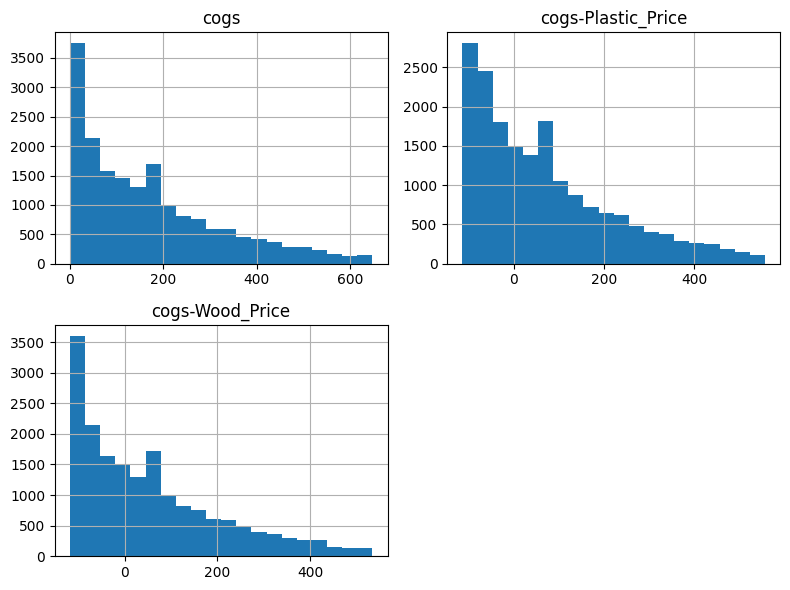

In [73]:
# histogram of cogs, cogs-Plastic_price, and cogs-Wood_Price
retail_df[['cogs','cogs-Plastic_Price','cogs-Wood_Price']].hist(bins=20, figsize=(8, 6))
plt.tight_layout()
plt.show()

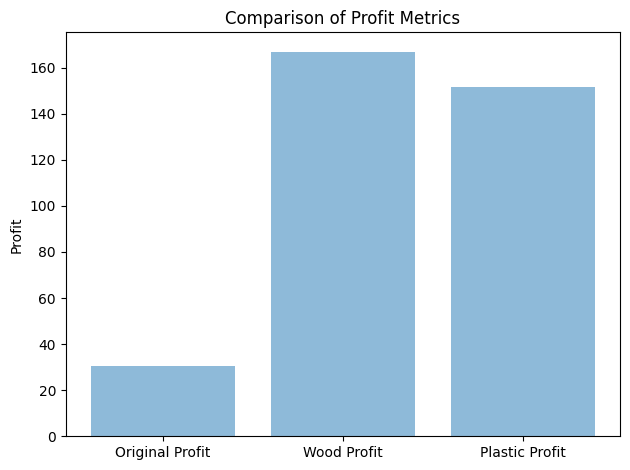

In [74]:
profit_data = retail_df[['profit', 'new_profit_Wood', 'new_profit_Plastic']]

# average profit for each category
profit_means = profit_data.mean()

# Create the bar chart
categories = ['Original Profit', 'Wood Profit', 'Plastic Profit']
x_pos = np.arange(len(categories))
plt.bar(x_pos, profit_means, align='center', alpha=0.5)
plt.xticks(x_pos, categories)
plt.ylabel('Profit')
plt.title('Comparison of Profit Metrics')
plt.tight_layout()
plt.show()

In [75]:
#bivariate and/or multivariate analysis

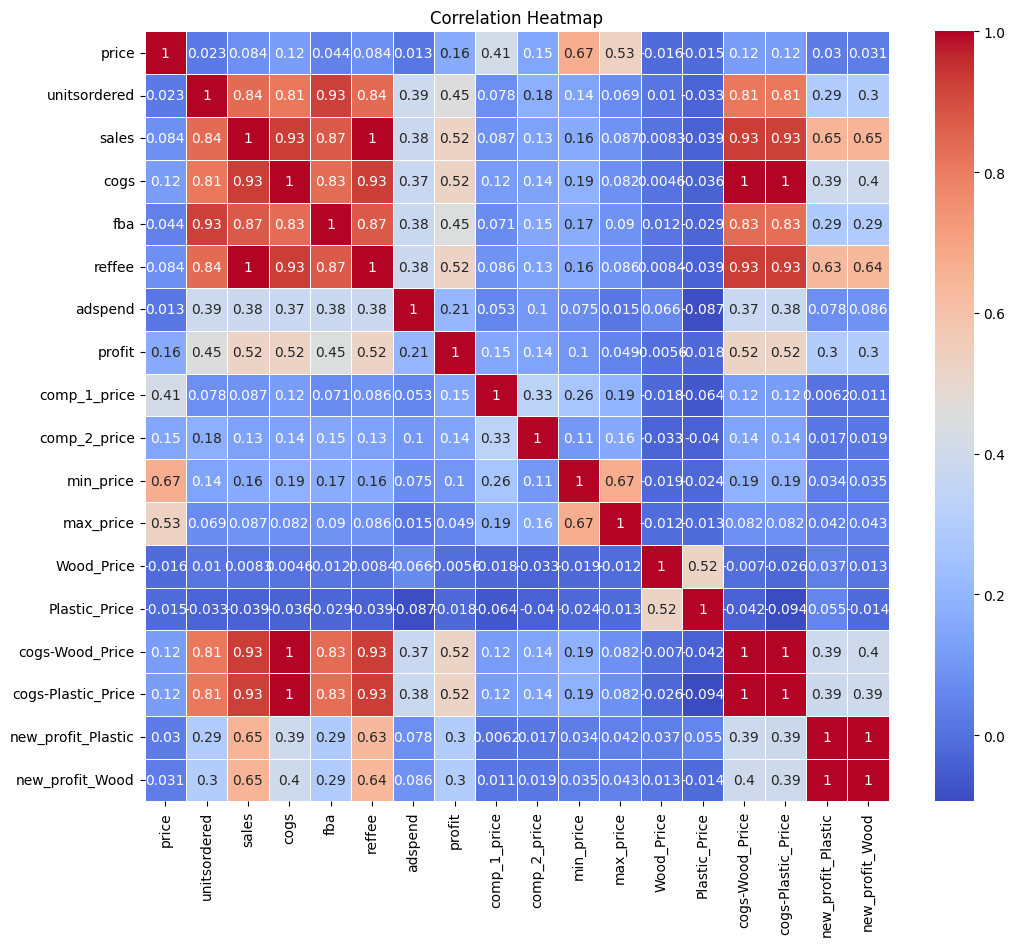

In [76]:
#heatmap for retail_df
plt.figure(figsize=(12, 10))
#numeri col only
numeric_df = retail_df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

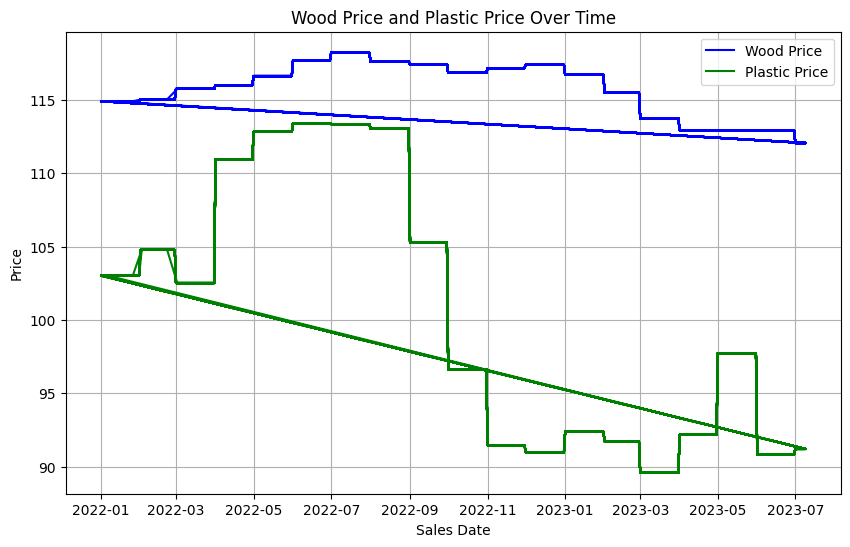

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Plot 'Wood_Price' over time
plt.plot(retail_df['salesdate'], retail_df['Wood_Price'], label='Wood Price', color='blue')

# Plot 'Plastic_Price' over time
plt.plot(retail_df['salesdate'], retail_df['Plastic_Price'], label='Plastic Price', color='green')

# Customize the plot
plt.xlabel('Sales Date')
plt.ylabel('Price')  # Changed y-axis label to "Price"
plt.title('Wood Price and Plastic Price Over Time') # Changed title
plt.legend()
plt.grid(True)  # Add a grid for better readability

plt.show()

In [78]:
retail_df.to_csv('BSS_Data_Edited.csv', index=False)

In [79]:
retail_df.describe()

,salesdate,price,unitsordered,sales,cogs,fba,reffee,adspend,profit,comp_1_price,comp_2_price,min_price,max_price,Wood_Price,Plastic_Price,cogs-Wood_Price,cogs-Plastic_Price,new_profit_Plastic,new_profit_Wood
count,18161,18161.000000,18161.000000,18161.000000,18161.000000,18161.000000,18161.000000,18161.000000,18161.000000,18161.000000,18161.000000,18161.000000,18161.000000,18161.000000,18161.000000,18161.000000,18161.000000,18161.000000,18161.000000
mean,2022-10-06 19:36:11.972909056,26.539568,16.869446,430.071527,170.171742,132.136226,64.582457,12.051920,30.709283,26.745927,23.290722,24.247759,33.207398,115.818025,100.563651,54.369623,69.622836,151.679986,166.933603
min,2022-01-01 00:00:00,12.903108,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-93.310000,0.106390,0.376477,14.990000,24.677618,112.070000,89.580000,-118.220000,-113.400000,-693.540000,-667.830000
25%,2022-05-22 00:00:00,23.790000,4.000000,107.000000,42.000000,32.000000,16.000000,0.390000,1.000000,14.935145,14.232683,21.990000,31.990000,114.920000,91.720000,-72.750000,-56.730000,104.020000,117.750000
50%,2022-10-07 00:00:00,26.690000,14.000000,338.000000,134.000000,106.000000,51.000000,9.000000,20.660000,26.990000,23.990000,24.990000,32.990000,116.020000,97.730000,17.990000,32.490000,127.190000,141.220000
75%,2023-02-22 00:00:00,29.490000,25.000000,660.000000,253.000000,197.000000,99.000000,18.000000,49.000000,32.970000,29.990000,26.990000,34.990000,117.400000,110.940000,137.370000,153.070000,175.510000,190.030000
max,2023-07-09 00:00:00,39.590000,64.000000,1628.000000,647.000000,494.000000,245.000000,54.330000,159.000000,59.990000,53.350946,29.990000,39.990000,118.230000,113.410000,534.070000,556.040000,1365.700000,1370.780000
std,NaN,4.791107,15.294199,385.856458,153.519932,119.519625,57.950296,13.090953,41.556171,12.788615,10.630429,3.388516,3.103436,1.780012,8.937931,153.521518,154.102511,117.352057,117.211771


In [80]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18161 entries, 0 to 18160
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   sku                 18161 non-null  object        
 1   salesdate           18161 non-null  datetime64[ns]
 2   price               18161 non-null  float64       
 3   unitsordered        18161 non-null  int64         
 4   sales               18161 non-null  int64         
 5   cogs                18161 non-null  int64         
 6   fba                 18161 non-null  int64         
 7   reffee              18161 non-null  int64         
 8   adspend             18161 non-null  float64       
 9   profit              18161 non-null  float64       
 10  comp_1_price        18161 non-null  float64       
 11  comp_2_price        18161 non-null  float64       
 12  min_price           18161 non-null  float64       
 13  max_price           18161 non-null  float64   

In [81]:
# Separate numeric and categorical columns
numeric_columns = retail_df.select_dtypes(include=['number', 'datetime']).columns.tolist()
categorical_columns = retail_df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# Output the result
print("Numeric Variables:", numeric_columns)
print("Categorical Variables:", categorical_columns)

Numeric Variables: ['salesdate', 'price', 'unitsordered', 'sales', 'cogs', 'fba', 'reffee', 'adspend', 'profit', 'comp_1_price', 'comp_2_price', 'min_price', 'max_price', 'Wood_Price', 'Plastic_Price', 'cogs-Wood_Price', 'cogs-Plastic_Price', 'new_profit_Plastic', 'new_profit_Wood']
Categorical Variables: ['sku']
